# Packages prepared

In [1]:
### Packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats.mstats import winsorize
#!pip install --upgrade pandas seaborn
# OLS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# K-means
import os
os.environ['OMP_NUM_THREADS'] = '13'

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# <center>Task 1: Exploratory Data Analysis, Visualisations, Descriptive Statistics</center> #

<h1 style="color:blue;">Cleaning Data</h1>


## Step 1: Load the data - Specify Data Types

In [2]:
import pandas as pd
import numpy as np

# Read in the CSV file without specifying a dtype
    
df = pd.read_csv('Stock_data_part1.csv',
    parse_dates=['date'],
    low_memory=False
)

# Convert 'date' column to datetime if it's not already done by parse_dates

df['date'] = pd.to_datetime(df['date'], errors='coerce')  # errors='coerce' will handle any non-date strings

# Function to print non-numeric values for each numeric column

def check_numeric(column_name):
    non_numeric = df[pd.to_numeric(df[column_name], errors='coerce').isna()][column_name].unique()
    print(f"Non-numeric values in {column_name}: {non_numeric}")

# List of columns to check, replace these with your actual column names

columns_to_check = [
    'SHRCD', 'BIDLO', 'ASKHI', 'PRC', 'VOL', 'RET', 'BID', 'ASK', 'SHROUT',
    'OPENPRC', 'NUMTRD', 'sprtrn'
]

# Check each column for non-numeric values

for column in columns_to_check:
    check_numeric(column)

Non-numeric values in SHRCD: [nan]
Non-numeric values in BIDLO: [nan]
Non-numeric values in ASKHI: [nan]
Non-numeric values in PRC: [nan]
Non-numeric values in VOL: [nan]
Non-numeric values in RET: ['B' nan 'C']
Non-numeric values in BID: [nan]
Non-numeric values in ASK: [nan]
Non-numeric values in SHROUT: [nan]
Non-numeric values in OPENPRC: [nan]
Non-numeric values in NUMTRD: [nan]
Non-numeric values in sprtrn: []


In [3]:
# Check columns of the entire dataset 'df'

df.columns

Index(['PERMNO', 'date', 'SHRCD', 'TICKER', 'COMNAM', 'PERMCO', 'BIDLO',
       'ASKHI', 'PRC', 'VOL', 'RET', 'BID', 'ASK', 'SHROUT', 'OPENPRC',
       'NUMTRD', 'sprtrn'],
      dtype='object')

In [4]:
# Read the variable specifications and pick out any strange values that we need to specify as missing

import numpy as np

# bidlo -> set to NaN if bidlo = 0

df.loc[df['BIDLO'] == 0, 'BIDLO'] = np.nan

# askhi -> set to NaN if askhi = 0

df.loc[df['ASKHI'] == 0, 'ASKHI'] = np.nan

# prc -> replace with abs(prc) if prc < 0

df.loc[df['PRC'] < 0, 'PRC'] = df['PRC'].abs()

# prc -> set to NaN if prc = 0

df.loc[df['PRC'] == 0, 'PRC'] = np.nan

# vol -> set to NaN if vol = -99

df.loc[df['VOL'] == -99, 'VOL'] = np.nan

# ret -> set to NaN if ret is -66, -77, -88, or -99
            
df.loc[df['RET'].isin([-66, -77, -88, -99]), 'RET'] = np.nan

# ret -> set to NaN if ret is 'B' or 'C'

df.loc[df['RET'] == 'B', 'RET'] = np.nan

df.loc[df['RET'] == 'C', 'RET'] = np.nan

# ask - bid < 0 then set ask and bid to NaN

mask = df['ASK'] - df['BID'] < 0
df.loc[mask, ['ASK', 'BID']] = np.nan

# if numtrd = 99 then set numtrd to NaN

df.loc[df['NUMTRD'] == 99, 'NUMTRD'] = np.nan

# Show the result

df.head()

,PERMNO,date,SHRCD,TICKER,COMNAM,PERMCO,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,SHROUT,OPENPRC,NUMTRD,sprtrn
0,10026,2019-08-20,11.0,JJSF,J & J SNACK FOODS CORP,7976,190.9700,196.74001,191.13000,136698.0,-0.020298,191.00000,191.13000,18841.0,194.70000,1903.0,-0.007915
1,10026,2019-08-21,11.0,JJSF,J & J SNACK FOODS CORP,7976,188.5025,192.56000,189.35001,101583.0,-0.009313,189.17000,189.35001,18841.0,191.98000,2252.0,0.008247
2,10026,2019-08-22,11.0,JJSF,J & J SNACK FOODS CORP,7976,187.9800,190.39000,189.32001,92198.0,-0.000158,189.32001,189.50000,18841.0,188.89999,1805.0,-0.000506
3,10026,2019-08-23,11.0,JJSF,J & J SNACK FOODS CORP,7976,185.5900,190.35001,186.14999,75522.0,-0.016744,186.14000,186.28000,18841.0,189.22000,1629.0,-0.025946
4,10026,2019-08-26,11.0,JJSF,J & J SNACK FOODS CORP,7976,186.7000,191.39999,191.23000,81788.0,0.027290,191.03999,191.25000,18841.0,187.11000,2070.0,0.010983


In [5]:
# Check the count of each variable

print(df.count())

PERMNO     1938801
date       1938801
SHRCD      1938777
TICKER     1928583
COMNAM     1938777
PERMCO     1938801
BIDLO      1927331
ASKHI      1927331
PRC        1927331
VOL        1927331
RET        1926749
BID        1927260
ASK        1927259
SHROUT     1938383
OPENPRC    1887105
NUMTRD      794020
sprtrn     1938801
dtype: int64


<p> We want to detect US securities between February 14, 2020, and March 20, 2020</p>

In [6]:
# Filter the date

df = df.sort_values(by=['date'])
df_filtered = df[(df['date'] >= '2020-02-14') & (df['date'] <= '2020-03-20')]

# Check the count of each variable after filtering

print(df_filtered.count())

PERMNO     190560
date       190560
SHRCD      190560
TICKER     189607
COMNAM     190560
PERMCO     190560
BIDLO      189440
ASKHI      189440
PRC        189440
VOL        189440
RET        189402
BID        189431
ASK        189431
SHROUT     190499
OPENPRC    186381
NUMTRD      78545
sprtrn     190560
dtype: int64


## Step 2: Check for duplicates, examine / remove them

In [7]:
# Drop duplicates based on 'PERMNO' and 'date' combination, keeping the first occurrence

df_drop = df_filtered.drop_duplicates(subset=['PERMNO', 'date'], keep='first')

# Verify the operation by checking for duplicates again

print(df_drop[df_drop.duplicated(subset=['PERMNO', 'date'], keep=False)])

Empty DataFrame
Columns: [PERMNO, date, SHRCD, TICKER, COMNAM, PERMCO, BIDLO, ASKHI, PRC, VOL, RET, BID, ASK, SHROUT, OPENPRC, NUMTRD, sprtrn]
Index: []


## Step 3: Check the units of measurement

In [8]:
# Ensure 'RET' and other financial columns are in a numeric format

numeric_columns = ['BIDLO', 'ASKHI', 'PRC', 'VOL', 'RET', 'BID', 'ASK', 'SHROUT', 'OPENPRC', 'NUMTRD', 'sprtrn']
for column in numeric_columns:
    df_drop[column] = pd.to_numeric(df_drop[column], errors='coerce')



### Merge the dataset with Fama-French Factors (Factors would be extracted as new variables putting into the dataset)

In [9]:
# Read in the CSV file without specifying a dtype

df_F_F = pd.read_csv('F-F_Research_Data_5_Factors_2x3_daily.csv',
    parse_dates=['Date'],
    low_memory=False
)

# Convert 'date' column to datetime if it's not already done by parse_dates

df_F_F['date'] = pd.to_datetime(df_F_F['Date'], errors='coerce')  # errors='coerce' will handle any non-date strings


# Merge the datasets into new

df_merged = pd.merge(df_drop, df_F_F[['date', 'SMB', 'HML', 'RMW', 'CMA', 'RF']], on=['date'], how='left')

df_merged

,PERMNO,date,SHRCD,TICKER,COMNAM,PERMCO,BIDLO,ASKHI,PRC,VOL,...,ASK,SHROUT,OPENPRC,NUMTRD,sprtrn,SMB,HML,RMW,CMA,RF
0,89505,2020-02-14,31.0,ATHE,ALTERITY THERAPEUTICS LTD,43507,0.66200,0.75000,0.70000,37537.0,...,0.70,6854.0,0.71,80.0,0.001844,-0.56,-0.66,-0.23,-0.30,0.006
1,89058,2020-02-14,73.0,IWP,ISHARES TRUST,37493,161.65781,162.32001,162.17999,184395.0,...,162.25,76000.0,161.84,NaN,0.001844,-0.56,-0.66,-0.23,-0.30,0.006
2,90523,2020-02-14,44.0,EOS,EATON VANCE ENHANC EQU INC FD II,46094,18.70000,18.84000,18.79000,79270.0,...,18.79,48983.0,18.81,NaN,0.001844,-0.56,-0.66,-0.23,-0.30,0.006
3,13897,2020-02-14,44.0,FPF,FIRST TRUST INT DUR PFD & INC FD,54393,24.56000,24.64000,24.64000,101523.0,...,24.64,60766.0,24.57,NaN,0.001844,-0.56,-0.66,-0.23,-0.30,0.006
4,14725,2020-02-14,73.0,DGRO,ISHARES TRUST,37493,42.90000,43.16000,43.05000,1376841.0,...,43.06,253000.0,43.12,NaN,0.001844,-0.56,-0.66,-0.23,-0.30,0.006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190555,28564,2020-03-20,11.0,CTS,C T S CORP,20371,18.12000,20.03000,18.24000,259008.0,...,18.27,32433.0,18.99,NaN,-0.043360,0.22,-0.88,-0.97,-1.12,0.006
190556,78077,2020-03-20,11.0,KAI,KADANT INC,29710,59.89000,65.32000,61.54000,148896.0,...,61.57,11422.0,59.89,NaN,-0.043360,0.22,-0.88,-0.97,-1.12,0.006
190557,15423,2020-03-20,12.0,MYT,URBAN TEA INC,54276,0.27140,0.31000,0.30000,60372.0,...,0.31,36180.0,0.31,243.0,-0.043360,0.22,-0.88,-0.97,-1.12,0.006
190558,91531,2020-03-20,11.0,OC,OWENS CORNING NEW,51337,30.53000,35.82000,31.17000,1890273.0,...,31.17,108278.0,35.26,NaN,-0.043360,0.22,-0.88,-0.97,-1.12,0.006


In [10]:
# Ensure new columns are in a numeric format

numeric_columns = ['SMB', 'HML', 'RMW', 'CMA', 'RF']
for column in numeric_columns:
    df_merged[column] = pd.to_numeric(df_merged[column], errors='coerce')

### Compute additional variables

<p>For the later tasks, the y-variable will be "ex_RET_t+1", which refers to the excess return for tomorrow</p>

In [11]:
# Excess Return, 'Risk Free rate' is retrieved from Fama French Factors

df_merged['ex_ret'] = df_merged['RET'] - df_merged['RF']

# sort data by PERMNO and date
df_merged.sort_values(['PERMNO', 'date'], inplace=True)

# generate ex_RET_t+1
df_merged['ex_RET_t+1'] = df_merged.groupby('PERMNO')['ex_ret'].shift(-1)

In [12]:
# Compute additional variables

# Market Premium

df_merged['Market_Premium'] = df_merged['sprtrn'] - df_merged['RF']

# Volatility
df_merged['Volatility'] = (df_merged['ASKHI'] - df_merged['BIDLO']) / (df_merged['ASKHI'] + df_merged['BIDLO'])

# Sharpe Ratio
# Calculate the Sharpe ratio
df_merged['Sharpe_ratio'] = np.where(df_merged['Volatility'] == 0, np.nan, df_merged['ex_RET_t+1'] / df_merged['Volatility'])

# Bid-ask spread
df_merged['RelSpread'] = (df_merged['ASK'] - df_merged['BID']) / ((df_merged['ASK'] + df_merged['BID']) / 2)
df_merged['RelSpread_bps'] = df_merged['RelSpread'] * 10_000

# Dollar Volume
df_merged['Dvol'] = df_merged['PRC'] * df_merged['VOL']
df_merged['dvol_mlnUSD'] = df_merged['Dvol'] / 1_000_000

# Market Capitalization
df_merged['MktCap'] = df_merged['PRC'] * df_merged['SHROUT']

df_merged.columns

Index(['PERMNO', 'date', 'SHRCD', 'TICKER', 'COMNAM', 'PERMCO', 'BIDLO',
       'ASKHI', 'PRC', 'VOL', 'RET', 'BID', 'ASK', 'SHROUT', 'OPENPRC',
       'NUMTRD', 'sprtrn', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'ex_ret',
       'ex_RET_t+1', 'Market_Premium', 'Volatility', 'Sharpe_ratio',
       'RelSpread', 'RelSpread_bps', 'Dvol', 'dvol_mlnUSD', 'MktCap'],
      dtype='object')

In [13]:
# Replace instances of RelSpread = 0 with NaN 

df_merged['RelSpread'] = df_merged['RelSpread'].replace(0, np.nan)
df_merged['RelSpread_bps'] = df_merged['RelSpread_bps'].replace(0, np.nan)

## Step 4: Identify missing values

In [14]:
# Count missing values for all variables

missing_values_count = df_merged.isna().sum()

print(df_merged.count)

print("Missing values count for each variable:")
print(missing_values_count)

<bound method DataFrame.count of         PERMNO       date  SHRCD TICKER                  COMNAM  PERMCO  \
6082     10026 2020-02-14   11.0   JJSF  J & J SNACK FOODS CORP    7976   
7740     10026 2020-02-18   11.0   JJSF  J & J SNACK FOODS CORP    7976   
17984    10026 2020-02-19   11.0   JJSF  J & J SNACK FOODS CORP    7976   
23545    10026 2020-02-20   11.0   JJSF  J & J SNACK FOODS CORP    7976   
31052    10026 2020-02-21   11.0   JJSF  J & J SNACK FOODS CORP    7976   
...        ...        ...    ...    ...                     ...     ...   
153405   93436 2020-03-16   11.0   TSLA               TESLA INC   53453   
163310   93436 2020-03-17   11.0   TSLA               TESLA INC   53453   
170443   93436 2020-03-18   11.0   TSLA               TESLA INC   53453   
179734   93436 2020-03-19   11.0   TSLA               TESLA INC   53453   
186267   93436 2020-03-20   11.0   TSLA               TESLA INC   53453   

            BIDLO      ASKHI        PRC         VOL  ...    ex_ret

In [15]:
# below codes are muted: NUMTRD have too much missing value.
# Considering the validility of the dataset, remove this variable. 

df_merged.drop(columns=['NUMTRD'], inplace=True)

import pandas as pd

# Imputation
# To fill in the missing values of 'OPENPRC' for each 'permno' during the given time period with 
# the previous non-missing value of 'OPENPRC' for that same 'permno'
df_merged['OPENPRC'] = df_merged.groupby('PERMNO')['OPENPRC'].ffill()

# Using mean values to fill missing values for the following variables
numeric_cols = ['BIDLO', 'ASKHI','PRC', 'VOL', 'RET', 'ex_ret', 'ex_RET_t+1','BID', 'ASK', 
                'SHROUT', 'Volatility', 'Sharpe_ratio',  'Dvol', 'dvol_mlnUSD', 
                'MktCap', 'RelSpread', 'RelSpread_bps']

# Group by PERMNO and calculate the average value of each variable for each PERMNO during the given time period.
grouped_means = df_merged.groupby('PERMNO')[numeric_cols].transform('mean')

# To fill missing values in each variable for each 'permno' during the given time period 
# with the average value of that variable for that 'permno' within the same time period
df_merged[numeric_cols] = df_merged[numeric_cols].fillna(grouped_means)

df_imputna = df_merged.copy()

df_imputna

,PERMNO,date,SHRCD,TICKER,COMNAM,PERMCO,BIDLO,ASKHI,PRC,VOL,...,ex_ret,ex_RET_t+1,Market_Premium,Volatility,Sharpe_ratio,RelSpread,RelSpread_bps,Dvol,dvol_mlnUSD,MktCap
6082,10026,2020-02-14,11.0,JJSF,J & J SNACK FOODS CORP,7976,172.30499,173.88499,173.59000,106159.0,...,-0.002880,-0.014526,-0.004156,0.004564,-3.182757,0.001383,13.834668,1.842814e+07,18.428141,3.284149e+06
7740,10026,2020-02-18,11.0,JJSF,J & J SNACK FOODS CORP,7976,171.14000,174.00000,172.11000,69535.0,...,-0.014526,0.004633,-0.008920,0.008286,0.559103,0.001452,14.515894,1.196767e+07,11.967669,3.256149e+06
17984,10026,2020-02-19,11.0,JJSF,J & J SNACK FOODS CORP,7976,171.68140,174.20000,173.94000,86921.0,...,0.004633,-0.002321,-0.001294,0.007282,-0.318745,0.001784,17.838133,1.511904e+07,15.119039,3.290771e+06
23545,10026,2020-02-20,11.0,JJSF,J & J SNACK FOODS CORP,7976,171.14000,174.91000,174.58000,65957.0,...,-0.002321,-0.003365,-0.009816,0.010894,-0.308875,0.001488,14.881804,1.151477e+07,11.514773,3.302879e+06
31052,10026,2020-02-21,11.0,JJSF,J & J SNACK FOODS CORP,7976,173.17500,175.56000,175.03999,131097.0,...,-0.003365,-0.002572,-0.016518,0.006839,-0.376078,0.001544,15.436380,2.294722e+07,22.947218,3.311582e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153405,93436,2020-03-16,11.0,TSLA,TESLA INC,53453,442.17001,494.86990,445.07001,20446685.0,...,-0.191778,-0.039410,-0.125841,0.056241,-0.700737,0.002182,21.822517,9.100206e+09,9100.206297,8.194184e+07
163310,93436,2020-03-17,11.0,TSLA,TESLA INC,53453,396.00000,471.85001,430.20001,23923871.0,...,-0.039410,-0.166344,0.053955,0.087400,-1.903251,0.000023,0.232793,1.029205e+10,10292.049543,7.920412e+07
170443,93436,2020-03-18,11.0,TSLA,TESLA INC,53453,350.51001,404.85999,361.22000,23718230.0,...,-0.166344,0.177877,-0.057831,0.071951,2.472180,0.002792,27.922813,8.567499e+09,8567.499041,6.650421e+07
179734,93436,2020-03-19,11.0,TSLA,TESLA INC,53453,358.45999,452.00000,427.64001,30136064.0,...,0.177877,-0.006257,-0.001292,0.115416,-0.054213,0.001498,14.977300,1.288739e+10,12887.386710,7.873280e+07


In [16]:
# Verify the operation by checking the remaining missing values in the dataset

missing_after = df_imputna.isna().sum()

print(f"Remaining missing values: {missing_after}")

Remaining missing values: PERMNO               0
date                 0
SHRCD                0
TICKER             953
COMNAM               0
PERMCO               0
BIDLO             1030
ASKHI             1030
PRC               1030
VOL               1030
RET               1036
BID               1030
ASK               1030
SHROUT               5
OPENPRC           1564
sprtrn               0
SMB                  0
HML                  0
RMW                  0
CMA                  0
RF                   0
ex_ret            1036
ex_RET_t+1        1119
Market_Premium       0
Volatility        1030
Sharpe_ratio      1123
RelSpread         1030
RelSpread_bps     1030
Dvol              1030
dvol_mlnUSD       1030
MktCap            1030
dtype: int64


In [17]:
# Drop missing values in "ex_RET_t+1"

df_imputna.dropna(subset=['ex_RET_t+1'],inplace=True)

df_dropna = df_imputna.copy()

df_dropna

,PERMNO,date,SHRCD,TICKER,COMNAM,PERMCO,BIDLO,ASKHI,PRC,VOL,...,ex_ret,ex_RET_t+1,Market_Premium,Volatility,Sharpe_ratio,RelSpread,RelSpread_bps,Dvol,dvol_mlnUSD,MktCap
6082,10026,2020-02-14,11.0,JJSF,J & J SNACK FOODS CORP,7976,172.30499,173.88499,173.59000,106159.0,...,-0.002880,-0.014526,-0.004156,0.004564,-3.182757,0.001383,13.834668,1.842814e+07,18.428141,3.284149e+06
7740,10026,2020-02-18,11.0,JJSF,J & J SNACK FOODS CORP,7976,171.14000,174.00000,172.11000,69535.0,...,-0.014526,0.004633,-0.008920,0.008286,0.559103,0.001452,14.515894,1.196767e+07,11.967669,3.256149e+06
17984,10026,2020-02-19,11.0,JJSF,J & J SNACK FOODS CORP,7976,171.68140,174.20000,173.94000,86921.0,...,0.004633,-0.002321,-0.001294,0.007282,-0.318745,0.001784,17.838133,1.511904e+07,15.119039,3.290771e+06
23545,10026,2020-02-20,11.0,JJSF,J & J SNACK FOODS CORP,7976,171.14000,174.91000,174.58000,65957.0,...,-0.002321,-0.003365,-0.009816,0.010894,-0.308875,0.001488,14.881804,1.151477e+07,11.514773,3.302879e+06
31052,10026,2020-02-21,11.0,JJSF,J & J SNACK FOODS CORP,7976,173.17500,175.56000,175.03999,131097.0,...,-0.003365,-0.002572,-0.016518,0.006839,-0.376078,0.001544,15.436380,2.294722e+07,22.947218,3.311582e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153405,93436,2020-03-16,11.0,TSLA,TESLA INC,53453,442.17001,494.86990,445.07001,20446685.0,...,-0.191778,-0.039410,-0.125841,0.056241,-0.700737,0.002182,21.822517,9.100206e+09,9100.206297,8.194184e+07
163310,93436,2020-03-17,11.0,TSLA,TESLA INC,53453,396.00000,471.85001,430.20001,23923871.0,...,-0.039410,-0.166344,0.053955,0.087400,-1.903251,0.000023,0.232793,1.029205e+10,10292.049543,7.920412e+07
170443,93436,2020-03-18,11.0,TSLA,TESLA INC,53453,350.51001,404.85999,361.22000,23718230.0,...,-0.166344,0.177877,-0.057831,0.071951,2.472180,0.002792,27.922813,8.567499e+09,8567.499041,6.650421e+07
179734,93436,2020-03-19,11.0,TSLA,TESLA INC,53453,358.45999,452.00000,427.64001,30136064.0,...,0.177877,-0.006257,-0.001292,0.115416,-0.054213,0.001498,14.977300,1.288739e+10,12887.386710,7.873280e+07


In [18]:
# Verify the operation by checking the remaining missing values in the dataset

missing_after = df_dropna.isna().sum()

print(f"Remaining missing values: {missing_after}")

Remaining missing values: PERMNO              0
date                0
SHRCD               0
TICKER              3
COMNAM              0
PERMCO              0
BIDLO               0
ASKHI               0
PRC                 0
VOL                 0
RET                 0
BID                 0
ASK                 0
SHROUT              0
OPENPRC           527
sprtrn              0
SMB                 0
HML                 0
RMW                 0
CMA                 0
RF                  0
ex_ret              0
ex_RET_t+1          0
Market_Premium      0
Volatility          0
Sharpe_ratio        4
RelSpread           0
RelSpread_bps       0
Dvol                0
dvol_mlnUSD         0
MktCap              0
dtype: int64


## Step 5: Check outliers

<p> Check the outliers of all numeric variables, some of them would be selected into the list of variables of interest.</p>

In [19]:
# The list of all numeric variables
all_numeric_variables = ['BIDLO',
       'ASKHI', 'PRC', 'VOL', 'RET', 'BID', 'ASK', 'SHROUT', 'OPENPRC',
       'sprtrn', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'ex_ret',
       'ex_RET_t+1', 'Market_Premium', 'Volatility', 'Sharpe_ratio',
       'RelSpread', 'RelSpread_bps', 'Dvol', 'dvol_mlnUSD', 'MktCap']

# Compute descriptive statistics for the updated list of variables
descriptive_stats = df_dropna[all_numeric_variables].describe(percentiles=[0.01, .25, .5, .75, 0.99])

# Use pd.concat to add variance, adjusting to match the format of descriptive_stats
variance = pd.DataFrame(df_dropna[all_numeric_variables].var().rename('var')).transpose()
descriptive_stats = pd.concat([descriptive_stats, variance])

# Transpose for readability
descriptive_stats_t = descriptive_stats.transpose()

# Apply formatting for thousands separator
formatted_stats = descriptive_stats_t.style.format("{:,.2f}")

# Display the formatted table of descriptive statistics
formatted_stats

,count,mean,std,min,1%,25%,50%,75%,99%,max,var
BIDLO,"189,441.00",76.34,"3,479.05",0.05,0.35,8.08,20.11,39.93,265.97,"340,965.00","12,103,778.15"
ASKHI,"189,441.00",79.76,"3,599.16",0.10,0.42,8.88,21.27,41.99,280.85,"344,975.00","12,953,927.28"
PRC,"189,441.00",78.05,"3,543.06",0.07,0.39,8.42,20.65,40.89,273.42,"344,000.00","12,553,247.74"
VOL,"189,441.00","1,784,656.97","7,444,337.35",0.00,0.00,"30,473.00","210,624.00","1,027,679.00","27,025,211.20","392,220,669.00","55,418,158,559,992.12"
RET,"189,441.00",-0.02,0.08,-0.81,-0.24,-0.04,-0.01,0.01,0.20,5.85,0.01
BID,"189,441.00",77.97,"3,543.04",0.01,0.38,8.36,20.57,40.80,273.22,"343,940.00","12,553,126.75"
ASK,"189,441.00",78.21,"3,551.03",0.08,0.39,8.47,20.73,40.96,274.03,"344,130.00","12,609,789.49"
SHROUT,"189,441.00","99,861.88","336,645.77",25.00,100.00,"7,010.00","27,458.00","75,565.00","1,284,579.00","8,836,149.00","113,330,376,463.08"
OPENPRC,"188,914.00",78.37,"3,549.48",0.07,0.40,8.51,20.80,41.14,273.97,"343,750.00","12,598,831.06"
sprtrn,"189,441.00",-0.01,0.05,-0.12,-0.12,-0.04,-0.01,0.00,0.09,0.09,0.00


## Summary Statistics for the variables of interest

In [20]:
# Update the list of variables of interest to include the new variables
variables_of_interest_1 = ['ex_ret','Volatility', 'Sharpe_ratio', 'RelSpread', 'Dvol', 'MktCap', 'Market_Premium']

# Compute descriptive statistics for the updated list of variables
descriptive_stats = df_dropna[variables_of_interest_1].describe(percentiles=[0.01, .25, .5, .75, 0.99])

# Use pd.concat to add variance, adjusting to match the format of descriptive_stats
variance = pd.DataFrame(df_dropna[variables_of_interest_1].var().rename('var')).transpose()
descriptive_stats = pd.concat([descriptive_stats, variance])

# Transpose for readability
descriptive_stats_t = descriptive_stats.transpose()

# Apply formatting for thousands separator
formatted_stats = descriptive_stats_t.style.format("{:,.2f}")

# Display the formatted table of descriptive statistics
formatted_stats


,count,mean,std,min,1%,25%,50%,75%,99%,max,var
ex_ret,"189,441.00",-0.02,0.08,-0.82,-0.24,-0.05,-0.02,0.00,0.19,5.84,0.01
Volatility,"189,441.00",0.04,0.04,0.00,0.00,0.01,0.02,0.05,0.19,0.75,0.00
Sharpe_ratio,"189,437.00",-2.66,54.76,"-11,289.30",-23.62,-2.79,-1.11,0.14,4.43,"6,833.91","2,998.28"
RelSpread,"189,441.00",0.01,0.03,0.00,0.00,0.00,0.00,0.01,0.11,1.98,0.00
Dvol,"189,441.00","83,519,213.71","941,226,564.56",0.00,0.00,"334,318.53","2,842,887.32","24,654,490.56","1,208,096,861.11","114,286,452,422.84","885,907,445,836,701,952.00"
MktCap,"189,441.00","5,078,008.61","30,904,935.86",328.18,"1,998.00","66,003.04","323,874.00","1,791,247.92","83,974,852.26","1,424,460,482.16","955,115,060,571,953.62"
Market_Premium,"189,441.00",-0.02,0.05,-0.13,-0.13,-0.05,-0.02,-0.00,0.09,0.09,0.00


In [21]:
# Winsorize

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import seaborn as sns
from scipy.stats import norm


# Remind of all numeric variables
all_numeric_variables = ['BIDLO',
       'ASKHI', 'PRC', 'VOL', 'RET', 'BID', 'ASK', 'SHROUT', 'OPENPRC',
       'sprtrn', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'ex_ret',
       'ex_RET_t+1', 'Market_Premium', 'Volatility', 'Sharpe_ratio',
       'RelSpread', 'RelSpread_bps', 'Dvol', 'dvol_mlnUSD', 'MktCap']

df_winsor = df_dropna.copy()

for col in all_numeric_variables:
    df_winsor[col] = winsorize(df_winsor[col], limits=[0.01, 0.01])

print(df_winsor.count())

PERMNO            189441
date              189441
SHRCD             189441
TICKER            189438
COMNAM            189441
PERMCO            189441
BIDLO             189441
ASKHI             189441
PRC               189441
VOL               189441
RET               189441
BID               189441
ASK               189441
SHROUT            189441
OPENPRC           189441
sprtrn            189441
SMB               189441
HML               189441
RMW               189441
CMA               189441
RF                189441
ex_ret            189441
ex_RET_t+1        189441
Market_Premium    189441
Volatility        189441
Sharpe_ratio      189441
RelSpread         189441
RelSpread_bps     189441
Dvol              189441
dvol_mlnUSD       189441
MktCap            189441
dtype: int64


<h1 style="color:orange;">Visualization</h1>

## Visualization for unwinsorized data

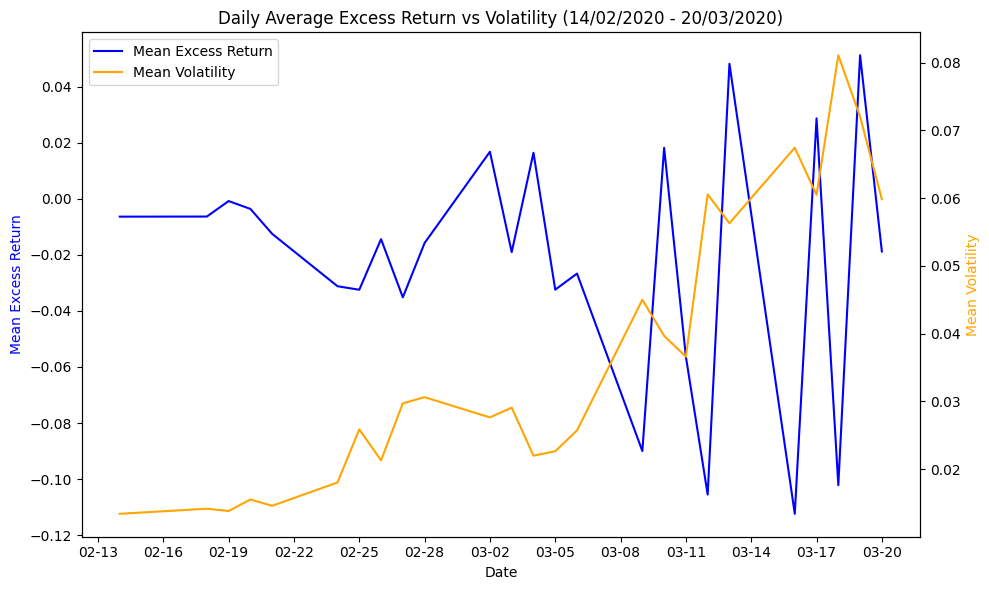

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Remind that using df_dropna as DataFrame for this part

# Group by date and calculate the daily average excess return and volatility
df_daily_mean_ret = df_dropna.groupby('date')['ex_ret'].mean()
df_daily_mean_volatility = df_dropna.groupby('date')['Volatility'].mean()

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot your data
ax.plot(df_daily_mean_ret.index, df_daily_mean_ret, label='Mean Excess Return', color='blue')

# Create a second y-axis for df_daily_mean_volatility
ax2 = ax.twinx()
ax2.plot(df_daily_mean_volatility.index, df_daily_mean_volatility, label='Mean Volatility', color='orange')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Mean Excess Return', color='blue')
ax2.set_ylabel('Mean Volatility', color='orange')
ax.set_title('Daily Average Excess Return vs Volatility (14/02/2020 - 20/03/2020)')

# Format x-axis
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))  

# Add legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left')

# Show plot
plt.tight_layout()
plt.savefig('Excess Return vs Volatility.png')
plt.show()

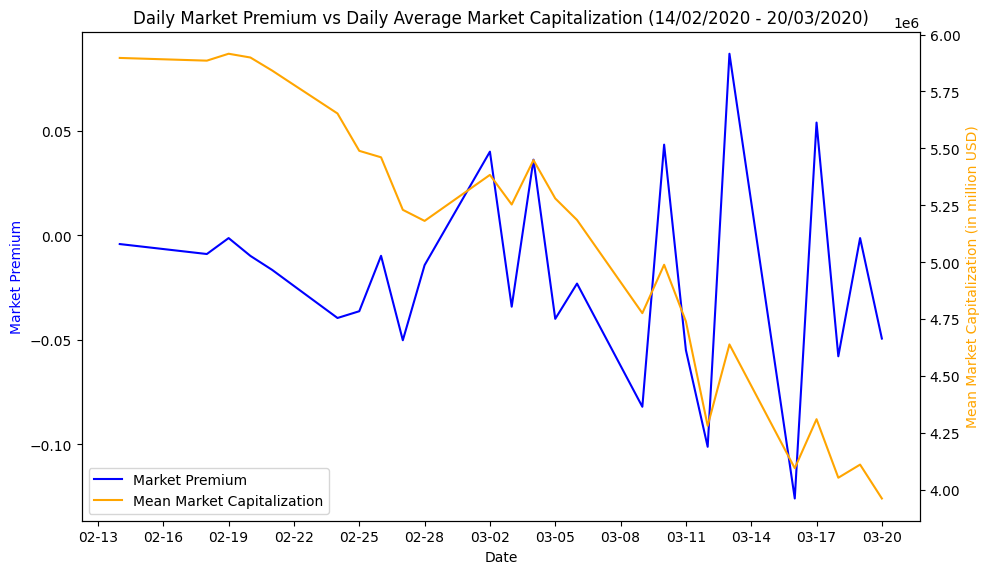

In [23]:
# Group by date and calculate the daily average Market Premium and Markect Capitalization
df_daily_mean_Market_Premium = df_dropna.groupby('date')['Market_Premium'].mean()
df_daily_mean_MktCap = df_dropna.groupby('date')['MktCap'].mean()

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot your data
ax.plot(df_daily_mean_Market_Premium.index, df_daily_mean_Market_Premium, label='Market Premium', color='blue')

# Create a second y-axis for df_daily_mean_MktCap
ax2 = ax.twinx()
ax2.plot(df_daily_mean_MktCap.index, df_daily_mean_MktCap, label='Mean Market Capitalization', color='orange')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Market Premium', color='blue')
ax2.set_ylabel('Mean Market Capitalization (in million USD)', color='orange')
ax.set_title('Daily Market Premium vs Daily Average Market Capitalization (14/02/2020 - 20/03/2020)')

# Format x-axis
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))  

# Add legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='lower left')

# Show plot
plt.tight_layout()
plt.savefig('Market Premium vs Market Capitalization.png')
plt.show()


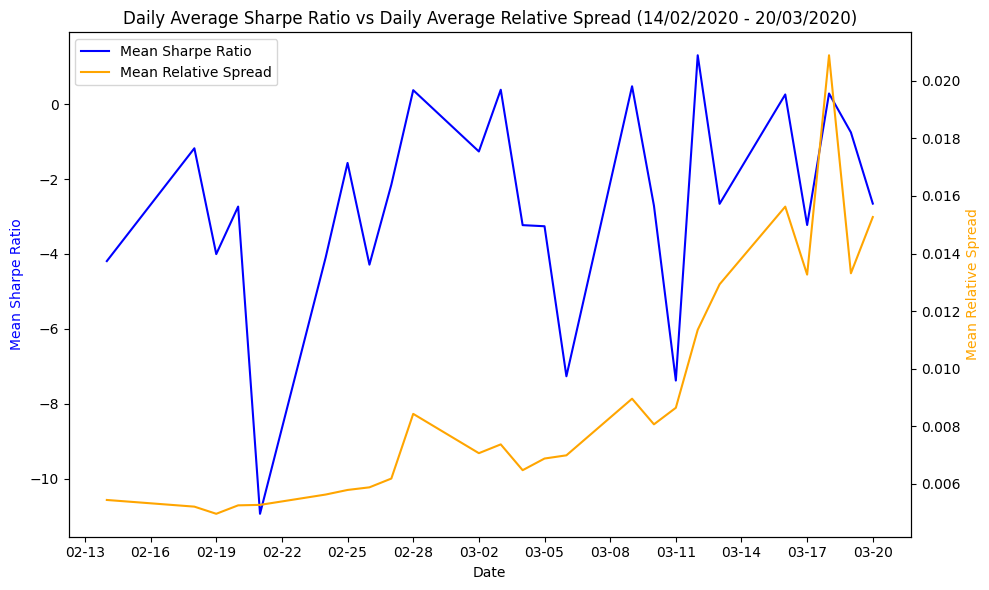

In [24]:
# Group by date and calculate the daily average Market Premium and Markect Capitalization
df_daily_mean_Sharpe_ratio = df_dropna.groupby('date')['Sharpe_ratio'].mean()
df_daily_mean_RelSpread = df_dropna.groupby('date')['RelSpread'].mean()

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot your data
ax.plot(df_daily_mean_Sharpe_ratio.index, df_daily_mean_Sharpe_ratio, label='Mean Sharpe Ratio', color='blue')

# Create a second y-axis for df_daily_mean_RelSpread
ax2 = ax.twinx()
ax2.plot(df_daily_mean_RelSpread.index, df_daily_mean_RelSpread, label='Mean Relative Spread', color='orange')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Mean Sharpe Ratio', color='blue')
ax2.set_ylabel('Mean Relative Spread', color='orange')
ax.set_title('Daily Average Sharpe Ratio vs Daily Average Relative Spread (14/02/2020 - 20/03/2020)')

# Format x-axis
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))  

# Add legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left')

# Show plot
plt.tight_layout()
plt.savefig('Sharpe Ratio vs Relative Spread.png')
plt.show()


# <center>Task 2: Supervised Machine Learning – OLS Regressions</center> #

In [25]:
# Generate a new dataframe for OLS based on df_winsor

df_ols = df_winsor.copy()

# Create log_MktCap
df_ols['log_MktCap'] = np.log(df_ols['MktCap'])


# Check the count of null for each variable
print(df_ols.isnull().sum())

PERMNO            0
date              0
SHRCD             0
TICKER            3
COMNAM            0
PERMCO            0
BIDLO             0
ASKHI             0
PRC               0
VOL               0
RET               0
BID               0
ASK               0
SHROUT            0
OPENPRC           0
sprtrn            0
SMB               0
HML               0
RMW               0
CMA               0
RF                0
ex_ret            0
ex_RET_t+1        0
Market_Premium    0
Volatility        0
Sharpe_ratio      0
RelSpread         0
RelSpread_bps     0
Dvol              0
dvol_mlnUSD       0
MktCap            0
log_MktCap        0
dtype: int64


In [26]:
# Define variables of interest for OLS regression
variables_of_interest_ols = ['Market_Premium', 'Volatility',
       'RelSpread', 'Sharpe_ratio','MktCap']

In [27]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Splitting the dataset into training and testing sets
X = df_ols[variables_of_interest_ols]  # Predictor
Y = df_ols['ex_RET_t+1']  # Target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initializing and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)


# Performance evaluation on testing dataset
Y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(Y_test, Y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(Y_test, Y_pred_test)
r_squared_test = model.score(X_test, Y_test)  # Calculate R-squared for test set

# Performance evaluation on training dataset
Y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(Y_train, Y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(Y_train, Y_pred_train)
r_squared_train = model.score(X_train, Y_train)  # Calculate R-squared for training set

# Organizing the metrics into DataFrames
performance_metrics_table_test = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R-squared'],
    'Test Dataset Value': [mse_test, rmse_test, mae_test, r_squared_test]
})

performance_metrics_table_train = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R-squared'],
    'Training Dataset Value': [mse_train, rmse_train, mae_train, r_squared_train]
})

print("Performance Metrics for the Testing Dataset:")
print(performance_metrics_table_test)
print("\nPerformance Metrics for the Training Dataset:")
print(performance_metrics_table_train)

Performance Metrics for the Testing Dataset:
      Metric  Test Dataset Value
0        MSE            0.003033
1       RMSE            0.055072
2        MAE            0.036471
3  R-squared            0.284593

Performance Metrics for the Training Dataset:
      Metric  Training Dataset Value
0        MSE                0.003068
1       RMSE                0.055394
2        MAE                0.036860
3  R-squared                0.290845


In [28]:
# Required libraries are already imported from your provided code.

import statsmodels.api as sm

# Function to add predictors one by one and fit a model for each addition.
def incremental_model_fitting(X_train, Y_train):
    predictors = X_train.columns.tolist()
    models_results = []

    for i in range(len(predictors)):
        # Selecting predictors up to the current step
        current_predictors = predictors[:i+1]
        X_train_sub = X_train[current_predictors]
        
        # Adding a constant for the intercept
        X_train_sub_const = sm.add_constant(X_train_sub)
        
        # Fitting the model
        model = sm.OLS(Y_train, X_train_sub_const).fit()
        
        # Extracting required statistics
        summary = model.summary2().tables[1]
        summary['Model'] = 'Model ' + str(i+1)
        summary['R-squared'] = model.rsquared
        
        # Formatting significance levels
        summary['P>|t|'] = summary['P>|t|'].apply(lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else '')
        
        models_results.append(summary[['Model', 'Coef.', 'P>|t|', '[0.025', '0.975]', 'R-squared']])
        
    # Combine results for all models
    combined_results = pd.concat(models_results, axis=0)
    return combined_results

# Execute the function and print the results
model_stats = incremental_model_fitting(X_train, Y_train)

# print(model_stats[model_stats['Model'] == 'Model 7'])
print(model_stats)

                  Model         Coef. P>|t|        [0.025        0.975]  \
const           Model 1 -3.351924e-02   *** -3.385190e-02 -3.318657e-02   
Market_Premium  Model 1 -5.222509e-01   *** -5.287102e-01 -5.157916e-01   
const           Model 2 -3.147574e-02   *** -3.191665e-02 -3.103482e-02   
Market_Premium  Model 2 -5.273031e-01   *** -5.337980e-01 -5.208083e-01   
Volatility      Model 2 -6.045172e-02   *** -6.901921e-02 -5.188423e-02   
const           Model 3 -3.149101e-02   *** -3.193908e-02 -3.104295e-02   
Market_Premium  Model 3 -5.272880e-01   *** -5.337834e-01 -5.207927e-01   
Volatility      Model 3 -6.081133e-02   *** -6.958200e-02 -5.204065e-02   
RelSpread       Model 3  3.534420e-03       -1.491187e-02  2.198071e-02   
const           Model 4 -9.497928e-03   *** -9.972534e-03 -9.023323e-03   
Market_Premium  Model 4 -4.508989e-01   *** -4.568692e-01 -4.449286e-01   
Volatility      Model 4 -2.739777e-01   *** -2.822987e-01 -2.656568e-01   
RelSpread       Model 4  

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

# Splitting the dataset into training and testing sets
X = df_ols[variables_of_interest_ols]  # Predictor
Y = df_ols['ex_RET_t+1']   # Target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initializing and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Get the coefficients and organize them into a DataFrame
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})

# Add a constant term to the independent variables matrix for statsmodels
X_train_sm = sm.add_constant(X_train)

# Fit the OLS regression model using statsmodels
model_sm = sm.OLS(Y_train, X_train_sm).fit()

# Print the summary of the OLS regression model
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:             ex_RET_t+1   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                 1.243e+04
Date:                Mon, 03 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:12:38   Log-Likelihood:             2.2344e+05
No. Observations:              151552   AIC:                        -4.469e+05
Df Residuals:                  151546   BIC:                        -4.468e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0090      0.000    -35.

In [30]:
### VIF test
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# 
vif_result = calculate_vif(X)

# VIF 
print(vif_result)

         Variable       VIF
0  Market_Premium  1.143324
1      Volatility  1.393208
2       RelSpread  1.262449
3    Sharpe_ratio  1.034011
4          MktCap  1.048445


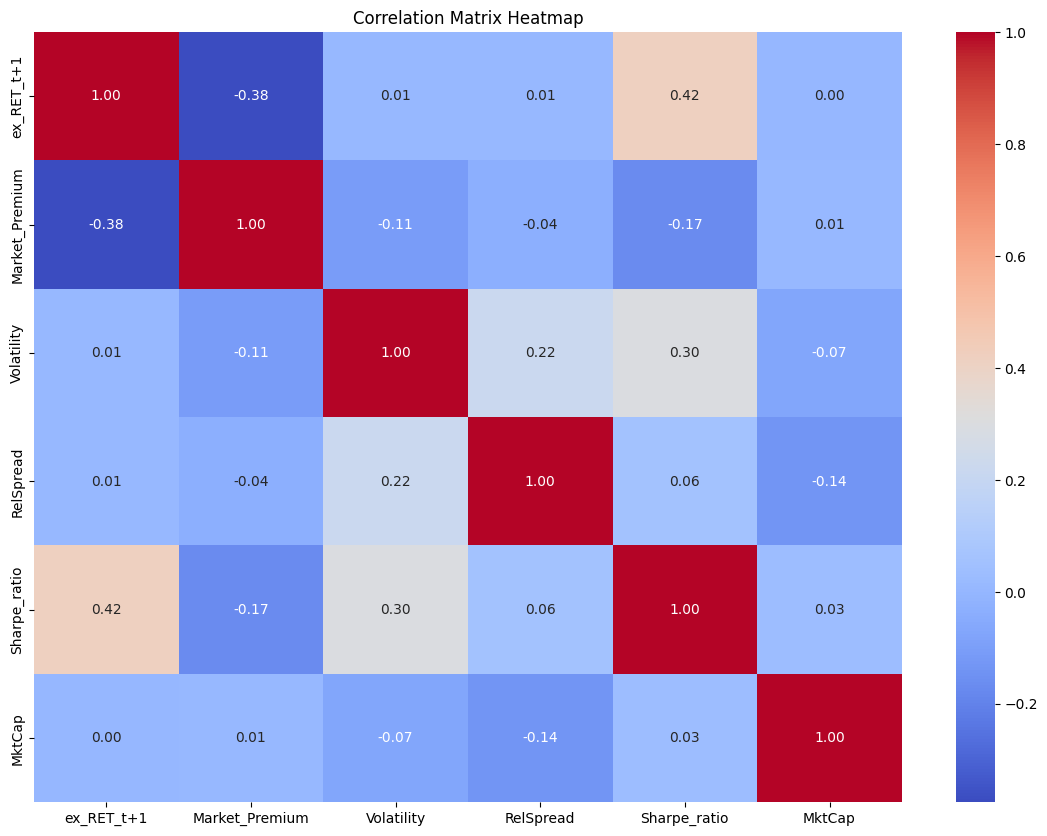

In [31]:
all_numeric_variables = ['BIDLO',
       'ASKHI', 'PRC', 'VOL', 'RET', 'BID', 'ASK', 'SHROUT', 'OPENPRC',
       'sprtrn', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'ex_ret',
       'ex_RET_t+1', 'Market_Premium', 'Volatility', 'Sharpe_ratio',
       'RelSpread', 'RelSpread_bps', 'Dvol', 'dvol_mlnUSD', 'MktCap']

all_numeric_variables_prepare_for_ols = ['ex_RET_t+1',
       'Market_Premium', 'Volatility', 'RelSpread',
       'Sharpe_ratio', 'MktCap']

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# creating the correlation matrix
corr_matrix = df_ols[all_numeric_variables_prepare_for_ols].corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Second OLS Regression Model

In [32]:
# Define variables of interest for OLS regression
variables_of_interest_ols_new = ['Market_Premium', 'Volatility',
       'Sharpe_ratio', 'RelSpread','CMA', 'log_MktCap']

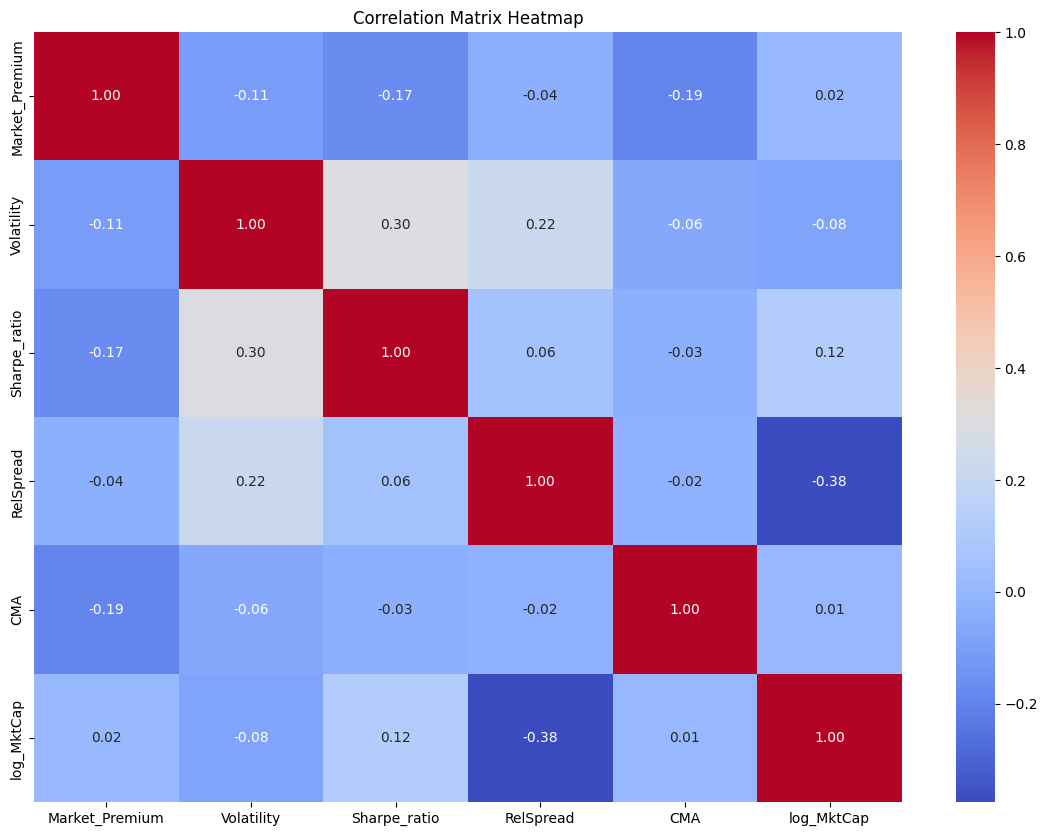

In [33]:
# creating the correlation matrix
corr_matrix = df_ols[variables_of_interest_ols_new].corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [34]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Splitting the dataset into training and testing sets
X = df_ols[variables_of_interest_ols_new]  # Predictor
Y = df_ols['ex_RET_t+1']  # Target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initializing and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)


# Performance evaluation on testing dataset
Y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(Y_test, Y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(Y_test, Y_pred_test)
r_squared_test = model.score(X_test, Y_test)  # Calculate R-squared for test set

# Performance evaluation on training dataset
Y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(Y_train, Y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(Y_train, Y_pred_train)
r_squared_train = model.score(X_train, Y_train)  # Calculate R-squared for training set

# Organizing the metrics into DataFrames
performance_metrics_table_test = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R-squared'],
    'Test Dataset Value': [mse_test, rmse_test, mae_test, r_squared_test]
})

performance_metrics_table_train = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R-squared'],
    'Training Dataset Value': [mse_train, rmse_train, mae_train, r_squared_train]
})

print("Performance Metrics for the Testing Dataset:")
print(performance_metrics_table_test)
print("\nPerformance Metrics for the Training Dataset:")
print(performance_metrics_table_train)

Performance Metrics for the Testing Dataset:
      Metric  Test Dataset Value
0        MSE            0.002991
1       RMSE            0.054693
2        MAE            0.036466
3  R-squared            0.294426

Performance Metrics for the Training Dataset:
      Metric  Training Dataset Value
0        MSE                0.003023
1       RMSE                0.054984
2        MAE                0.036832
3  R-squared                0.301290


In [35]:
# Required libraries are already imported from your provided code.

import statsmodels.api as sm

# Function to add predictors one by one and fit a model for each addition.
def incremental_model_fitting(X_train, Y_train):
    predictors = X_train.columns.tolist()
    models_results = []

    for i in range(len(predictors)):
        # Selecting predictors up to the current step
        current_predictors = predictors[:i+1]
        X_train_sub = X_train[current_predictors]
        
        # Adding a constant for the intercept
        X_train_sub_const = sm.add_constant(X_train_sub)
        
        # Fitting the model
        model = sm.OLS(Y_train, X_train_sub_const).fit()
        
        # Extracting required statistics
        summary = model.summary2().tables[1]
        summary['Model'] = 'Model ' + str(i+1)
        summary['R-squared'] = model.rsquared
        
        # Formatting significance levels
        summary['P>|t|'] = summary['P>|t|'].apply(lambda x: '***' if x < 0.01 else '**' if x < 0.05 else '*' if x < 0.1 else '')
        
        models_results.append(summary[['Model', 'Coef.', 'P>|t|', '[0.025', '0.975]', 'R-squared']])
        
    # Combine results for all models
    combined_results = pd.concat(models_results, axis=0)
    return combined_results

# Execute the function and print the results
model_stats = incremental_model_fitting(X_train, Y_train)

# print(model_stats[model_stats['Model'] == 'Model 7'])
print(model_stats)

                  Model     Coef. P>|t|    [0.025    0.975]  R-squared
const           Model 1 -0.033519   *** -0.033852 -0.033187   0.142150
Market_Premium  Model 1 -0.522251   *** -0.528710 -0.515792   0.142150
const           Model 2 -0.031476   *** -0.031917 -0.031035   0.143232
Market_Premium  Model 2 -0.527303   *** -0.533798 -0.520808   0.143232
Volatility      Model 2 -0.060452   *** -0.069019 -0.051884   0.143232
const           Model 3 -0.009424   *** -0.009893 -0.008955   0.290586
Market_Premium  Model 3 -0.450983   *** -0.456952 -0.445013   0.290586
Volatility      Model 3 -0.272160   *** -0.280299 -0.264020   0.290586
Sharpe_ratio    Model 3  0.006891   ***  0.006815  0.006967   0.290586
const           Model 4 -0.009498   *** -0.009973 -0.009023   0.290606
Market_Premium  Model 4 -0.450899   *** -0.456869 -0.444929   0.290606
Volatility      Model 4 -0.273978   *** -0.282299 -0.265657   0.290606
Sharpe_ratio    Model 4  0.006892   ***  0.006816  0.006968   0.290606
RelSpr

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

# Splitting the dataset into training and testing sets
X = df_ols[variables_of_interest_ols_new]  # Predictor
Y = df_ols['ex_RET_t+1']   # Target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initializing and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Get the coefficients and organize them into a DataFrame
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})

# Add a constant term to the independent variables matrix for statsmodels
X_train_sm = sm.add_constant(X_train)

# Fit the OLS regression model using statsmodels
model_sm = sm.OLS(Y_train, X_train_sm).fit()

# Print the summary of the OLS regression model
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:             ex_RET_t+1   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                 1.089e+04
Date:                Mon, 03 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:12:39   Log-Likelihood:             2.2457e+05
No. Observations:              151552   AIC:                        -4.491e+05
Df Residuals:                  151545   BIC:                        -4.490e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0212      0.001     23.

In [37]:
### VIF test
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# 假设 X 是你的自变量数据框
vif_result = calculate_vif(X)

# 输出 VIF 结果
print(vif_result)

         Variable       VIF
0  Market_Premium  1.259225
1      Volatility  2.191514
2    Sharpe_ratio  1.308811
3       RelSpread  1.256191
4             CMA  1.050089
5      log_MktCap  2.506743


# <center>Task 3</center> #

In [38]:
# Creating the dataset for Logit regression based on df_ols
df_logit = df_ols.copy()

# 创建股价变化是否为正的虚拟变量
df_logit.loc[:, 'Price_Increase'] = np.where(df_logit['ex_RET_t+1'] > 0, 1, 0)

print(df_logit['Price_Increase'].value_counts())

Price_Increase
0    137198
1     52243
Name: count, dtype: int64


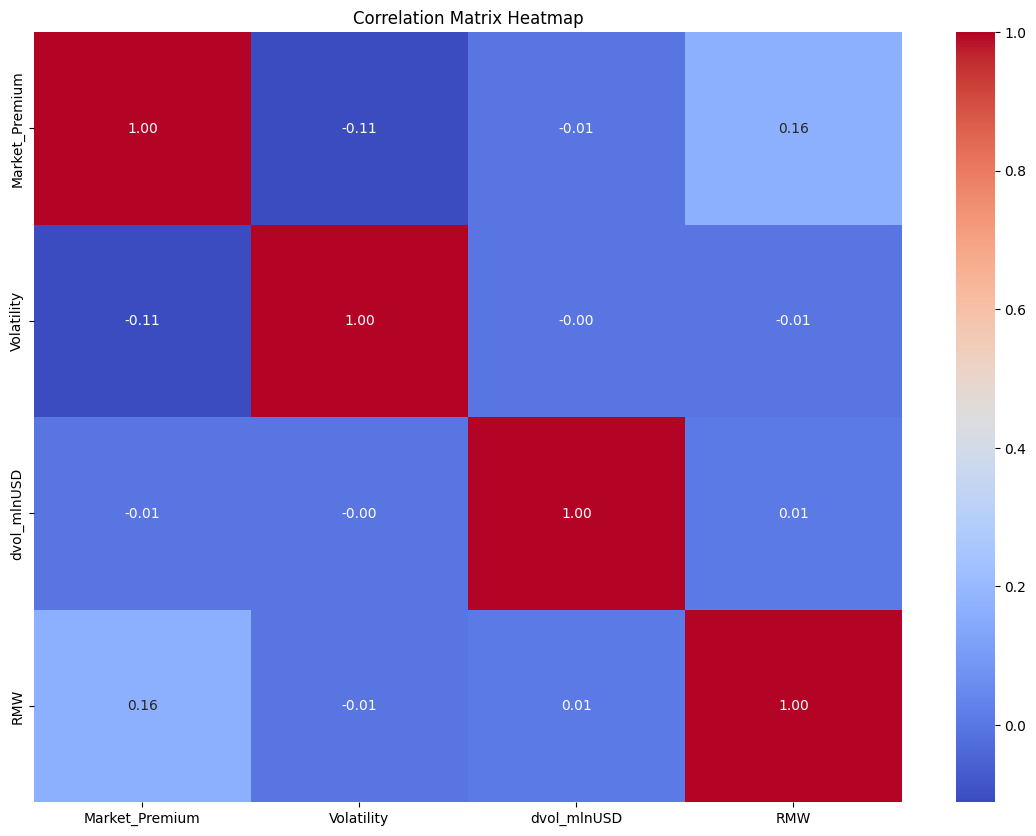

In [39]:
all_numeric_variables = ['BIDLO',
       'ASKHI', 'PRC', 'VOL', 'RET', 'BID', 'ASK', 'SHROUT', 'OPENPRC',
       'sprtrn', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'ex_ret',
       'ex_RET_t+1', 'Market_Premium', 'Volatility', 'Sharpe_ratio',
       'RelSpread', 'RelSpread_bps', 'Dvol', 'dvol_mlnUSD', 'MktCap']

# Define variables of interest for Logit Regression
variables_of_interest_logit = ['Market_Premium', 'Volatility',
       'dvol_mlnUSD', 'RMW']

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# creating the correlation matrix
corr_matrix = df_ols[variables_of_interest_logit].corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [40]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
    
# Splitting the dataset into training and testing sets
X = df_logit[variables_of_interest_logit] # Predictor
Y = df_logit['Price_Increase']  # Define price_increase variable and Target as binary
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

# Add a constant to the predictors in the training and testing set
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Estimate the Logistic regression model using training data
logit_model = sm.Logit(Y_train, X_train_const).fit()

# Display the model summary to get coefficients, and pseudo-R squared
print(logit_model.summary())

# Calculate predicted probabilities on testing data
predicted_prob_test = logit_model.predict(X_test_const)

# Determine classification based on threshold of 0.5
predicted_class_test = np.where(predicted_prob_test > 0.5, 1, 0)

# Calculate True Positives, True Negatives, False Positives, False Negatives
true_positives = np.sum((Y_test == 1) & (predicted_class_test == 1))
true_negatives = np.sum((Y_test == 0) & (predicted_class_test == 0))
false_positives = np.sum((Y_test == 0) & (predicted_class_test == 1))
false_negatives = np.sum((Y_test == 1) & (predicted_class_test == 0))

print(f"True Positives: {true_positives}")
print(f"True Negatives: {true_negatives}")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")



Optimization terminated successfully.
         Current function value: 0.526023
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         Price_Increase   No. Observations:               151552
Model:                          Logit   Df Residuals:                   151547
Method:                           MLE   Df Model:                            4
Date:                Mon, 03 Jun 2024   Pseudo R-squ.:                  0.1073
Time:                        23:12:39   Log-Likelihood:                -79720.
converged:                       True   LL-Null:                       -89305.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.6661      0.010   -166.799      0.000      -1.686      -1.647
Market_Premium   

In [41]:
# Manually calculate accuracy
accuracy_manual = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)

# Manually calculate precision
precision_manual = true_positives / (true_positives + false_positives)

# Manually calculate recall
recall_manual = true_positives / (true_positives + false_negatives)

# Print the manually calculated metrics
print(f"Manually calculated Accuracy: {accuracy_manual:.2f}")
print(f"Manually calculated Precision: {precision_manual:.2f}")
print(f"Manually calculated Recall: {recall_manual:.2f}")

Manually calculated Accuracy: 0.77
Manually calculated Precision: 0.70
Manually calculated Recall: 0.29


# <center>Task 4</center> #

<h1 style="color:blue;">Import and Cleaning Data</h1>

In [42]:
# import data

df2 = pd.read_csv('Stock_data_part2.csv')

# covert dtype of date
df2['public_date'] = pd.to_datetime(df2['public_date'], dayfirst=True)

# convert dtype of div yield
df2['divyield'] = df2['divyield'].str.replace('%', '', regex=True).astype(float) / 100

print(df2.dtypes)
df2

public_date    datetime64[ns]
CAPEI                 float64
bm                    float64
evm                   float64
pe_exi                float64
dpr                   float64
npm                   float64
roa                   float64
roe                   float64
roce                  float64
ptb                   float64
divyield              float64
TICKER                 object
dtype: object


,public_date,CAPEI,bm,evm,pe_exi,dpr,npm,roa,roe,roce,ptb,divyield,TICKER
0,2010-01-31,17.934,1.077,7.981,16.433,0.0,0.041,0.095,0.079,0.099,1.152,NaN,AIR
1,2010-02-28,17.554,1.077,7.981,16.085,0.0,0.041,0.095,0.079,0.099,1.128,NaN,AIR
2,2010-03-31,19.257,1.077,7.981,17.603,0.0,0.041,0.095,0.079,0.099,1.237,NaN,AIR
3,2010-04-30,18.304,0.898,9.293,19.349,0.0,0.037,0.086,0.067,0.097,1.197,NaN,AIR
4,2010-05-31,14.791,0.898,9.293,15.635,0.0,0.037,0.086,0.067,0.097,0.968,NaN,AIR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
577827,2022-08-31,NaN,1.411,-2.991,-1.217,NaN,NaN,-0.342,-0.377,-0.386,0.684,NaN,INDP
577828,2022-09-30,NaN,1.411,-2.991,-1.043,NaN,NaN,-0.342,-0.377,-0.386,0.587,NaN,INDP
577829,2022-10-31,NaN,1.411,-2.991,-0.884,NaN,NaN,-0.342,-0.377,-0.386,0.497,NaN,INDP
577830,2022-11-30,NaN,1.545,-2.138,-1.084,NaN,NaN,-0.361,-0.403,-0.406,0.546,NaN,INDP


In [43]:
# missing values
print(df2.isnull().sum())

public_date         0
CAPEI           31354
bm              30031
evm              6784
pe_exi          19343
dpr            202247
npm             29690
roa              8180
roe             39717
roce            10888
ptb             30031
divyield       363389
TICKER           9971
dtype: int64


In [44]:
# remove observations with missing 'TICKER' and 'public_date'
df2.dropna(subset=(['TICKER', 'public_date']), inplace=True)

df2

,public_date,CAPEI,bm,evm,pe_exi,dpr,npm,roa,roe,roce,ptb,divyield,TICKER
0,2010-01-31,17.934,1.077,7.981,16.433,0.0,0.041,0.095,0.079,0.099,1.152,NaN,AIR
1,2010-02-28,17.554,1.077,7.981,16.085,0.0,0.041,0.095,0.079,0.099,1.128,NaN,AIR
2,2010-03-31,19.257,1.077,7.981,17.603,0.0,0.041,0.095,0.079,0.099,1.237,NaN,AIR
3,2010-04-30,18.304,0.898,9.293,19.349,0.0,0.037,0.086,0.067,0.097,1.197,NaN,AIR
4,2010-05-31,14.791,0.898,9.293,15.635,0.0,0.037,0.086,0.067,0.097,0.968,NaN,AIR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
577827,2022-08-31,NaN,1.411,-2.991,-1.217,NaN,NaN,-0.342,-0.377,-0.386,0.684,NaN,INDP
577828,2022-09-30,NaN,1.411,-2.991,-1.043,NaN,NaN,-0.342,-0.377,-0.386,0.587,NaN,INDP
577829,2022-10-31,NaN,1.411,-2.991,-0.884,NaN,NaN,-0.342,-0.377,-0.386,0.497,NaN,INDP
577830,2022-11-30,NaN,1.545,-2.138,-1.084,NaN,NaN,-0.361,-0.403,-0.406,0.546,NaN,INDP


In [45]:
# Drop duplicates based on 'public_date', 'TICKER' combination, keeping the first occurrence
df2_drop = df2.drop_duplicates(subset=['public_date', 'TICKER'], keep='first')

# set 'public_date' as index column
df2_drop.set_index('public_date', inplace=True)

df2_drop

,CAPEI,bm,evm,pe_exi,dpr,npm,roa,roe,roce,ptb,divyield,TICKER
public_date,,,,,,,,,,,,
2010-01-31,17.934,1.077,7.981,16.433,0.0,0.041,0.095,0.079,0.099,1.152,NaN,AIR
2010-02-28,17.554,1.077,7.981,16.085,0.0,0.041,0.095,0.079,0.099,1.128,NaN,AIR
2010-03-31,19.257,1.077,7.981,17.603,0.0,0.041,0.095,0.079,0.099,1.237,NaN,AIR
2010-04-30,18.304,0.898,9.293,19.349,0.0,0.037,0.086,0.067,0.097,1.197,NaN,AIR
2010-05-31,14.791,0.898,9.293,15.635,0.0,0.037,0.086,0.067,0.097,0.968,NaN,AIR
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,NaN,1.411,-2.991,-1.217,NaN,NaN,-0.342,-0.377,-0.386,0.684,NaN,INDP
2022-09-30,NaN,1.411,-2.991,-1.043,NaN,NaN,-0.342,-0.377,-0.386,0.587,NaN,INDP
2022-10-31,NaN,1.411,-2.991,-0.884,NaN,NaN,-0.342,-0.377,-0.386,0.497,NaN,INDP


<p> Choosing variables for clustering analysis based on correlation matrix, if the variables are weakly correlated, clustering could be proceeded without concern for redundancy. </p>

In [46]:
df2_drop.columns

Index(['CAPEI', 'bm', 'evm', 'pe_exi', 'dpr', 'npm', 'roa', 'roe', 'roce',
       'ptb', 'divyield', 'TICKER'],
      dtype='object')

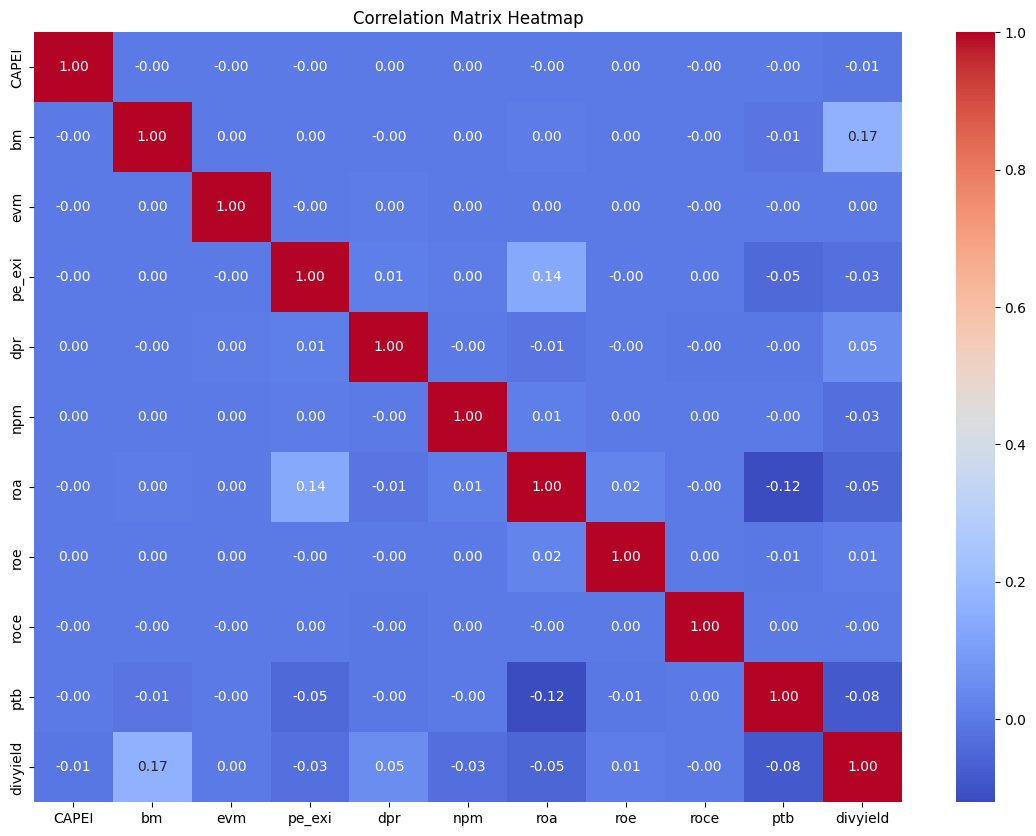

In [47]:
variables = ['CAPEI', 'bm', 'evm', 'pe_exi', 'dpr', 'npm', 'roa', 'roe', 'roce',
       'ptb', 'divyield'] 

# creating the correlation matrix
corr_matrix_task4 = df2_drop[variables].corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix_task4, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### According to the correlation matrix above, evm and npm has a relatively low correlation

In [48]:
# Check the observation numbers of positve and negative values for evm and npm
import pandas as pd


# Count positive and negative values for evm
positive_evm = (df2_drop['evm'] > 0).sum()
negative_evm = (df2_drop['evm'] < 0).sum()

# Count positive and negative values for npm
positive_npm = (df2_drop['npm'] > 0).sum()
negative_npm = (df2_drop['npm'] < 0).sum()

# Print the results
print(f"Positive values for EVM: {positive_evm}")
print(f"Negative values for EVM: {negative_evm}")
print(f"Positive values for NPM: {positive_npm}")
print(f"Negative values for NPM: {negative_npm}")

Positive values for EVM: 424357
Negative values for EVM: 134995
Positive values for NPM: 353131
Negative values for NPM: 183025


In [49]:
# Filter out the time period based on 31/01/2020 and 30/06/2020

# 31/01/2020
df2_2020_01_31 = df2_drop.loc['2020-01-31']

# 30/06/2020
df2_2020_06_30 = df2_drop.loc['2020-06-30']

In [50]:
# Checking total observation numbers and missing values in 31/01/2020 and 30/06/2020 seperately
print(len(df2_2020_01_31))
print(df2_2020_01_31.isnull().sum())

print(len(df2_2020_06_30))
print(df2_2020_06_30.isnull().sum())

3492
CAPEI        220
bm           162
evm           54
pe_exi       123
dpr         1232
npm          258
roa           51
roe          204
roce          53
ptb          162
divyield    2117
TICKER         0
dtype: int64
3510
CAPEI        130
bm           205
evm           33
pe_exi       118
dpr         1376
npm          272
roa           40
roe          198
roce          48
ptb          205
divyield    2306
TICKER         0
dtype: int64


# As of end of 31/01/2020

## K-means clustering

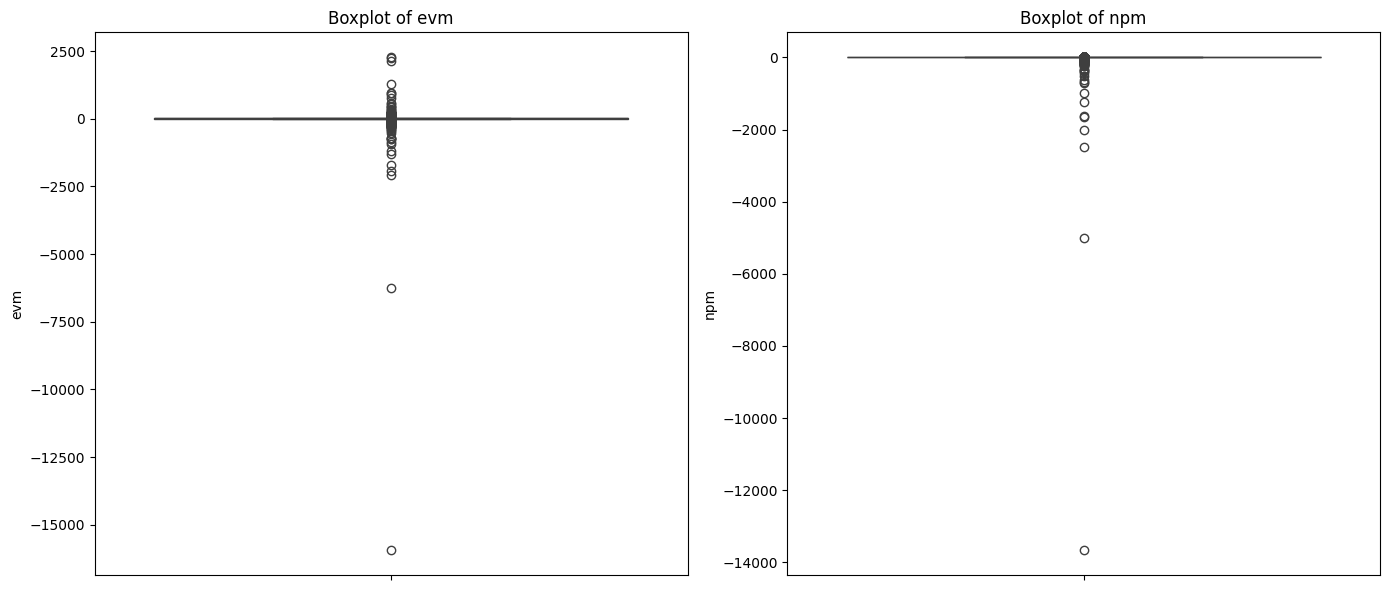

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns of interest and drop NaNs
df2_2020_01_31_boxplot = df2_2020_01_31[['evm', 'npm']].dropna()

df2_2020_01_31_boxplot_variables = ['evm', 'npm']

# Create 1x2 subplot map
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot boxplots
for idx, var in enumerate(df2_2020_01_31_boxplot_variables):
    sns.boxplot(y=df2_2020_01_31_boxplot[var], ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {var}')

# Display the plots
plt.tight_layout()
plt.show()

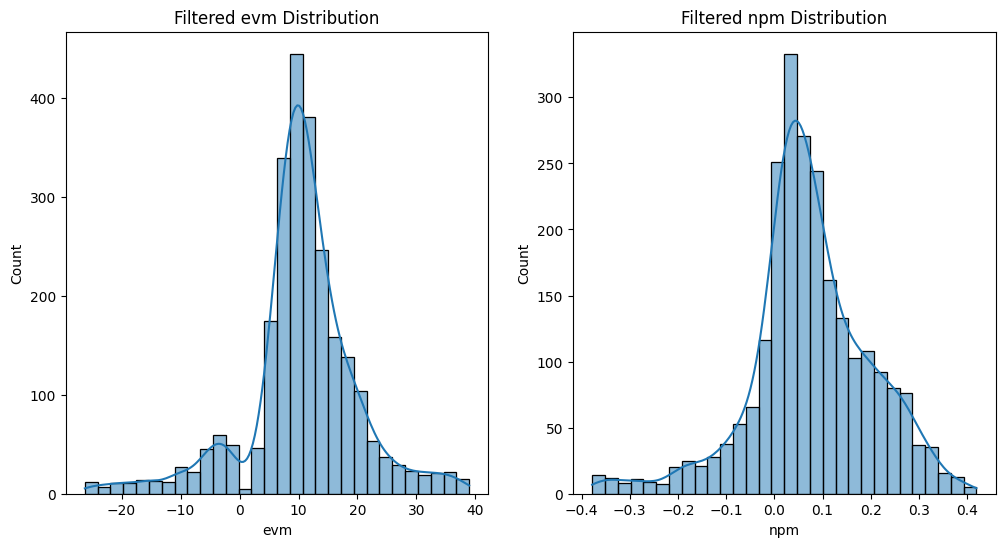

             CAPEI           bm          evm       pe_exi          dpr  \
count  2466.000000  2471.000000  2540.000000  2504.000000  2022.000000   
mean     22.811879     0.949752    10.572871    13.983034     0.629446   
std     135.408199     8.793519     9.516191    64.131197     5.061594   
min   -1844.500000     0.006000   -26.227000  -397.140000   -12.903000   
25%       3.861750     0.303500     7.341750    -0.044250     0.000000   
50%      18.093500     0.593000    10.595000    14.194500     0.222000   
75%      31.738750     0.906500    14.842750    25.218750     0.455000   
max    2766.960000   434.338000    38.936000   362.621000   153.493000   

               npm          roa          roe         roce          ptb  \
count  2387.000000  2542.000000  2440.000000  2540.000000  2471.000000   
mean      0.073151     0.045178     0.011142    -0.035791     3.609640   
std       0.126441     0.271070     0.865961     5.071109     7.225849   
min      -0.378000    -3.921000   -13

In [52]:
# Check and handle outliers (use appropriate method based on data distribution)
# For example: Use the Interquartile Range (IQR) method to detect and handle outliers
Q1 = df2_2020_01_31[['evm', 'npm']].quantile(0.25)
Q3 = df2_2020_01_31[['evm', 'npm']].quantile(0.75)
IQR = Q3 - Q1

# Align the columns before filtering outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df2_2020_01_31_filtered = df2_2020_01_31[~((df2_2020_01_31[['evm', 'npm']] < lower_bound) | (df2_2020_01_31[['evm', 'npm']] > upper_bound)).any(axis=1)]

# Recheck data distribution after cleaning
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df2_2020_01_31_filtered['evm'].dropna(), bins=30, kde=True)
plt.title('Filtered evm Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df2_2020_01_31_filtered['npm'].dropna(), bins=30, kde=True)
plt.title('Filtered npm Distribution')
plt.show()

# Final check of cleaned data
print(df2_2020_01_31_filtered.describe())

In [53]:
# Replace instances of evm = 0 and npm = 0 with NaN, 
# because 0 in these variables are more likely caused by inputting or accounting mistakes 

df2_2020_01_31_filtered.loc[df2_2020_01_31_filtered['evm'] == 0, 'evm'] = np.nan
df2_2020_01_31_filtered.loc[df2_2020_01_31_filtered['npm'] == 0, 'npm'] = np.nan

df2_2020_01_31_features = df2_2020_01_31_filtered[['evm', 'npm', 'TICKER']].dropna()

tickers = df2_2020_01_31_features['TICKER']


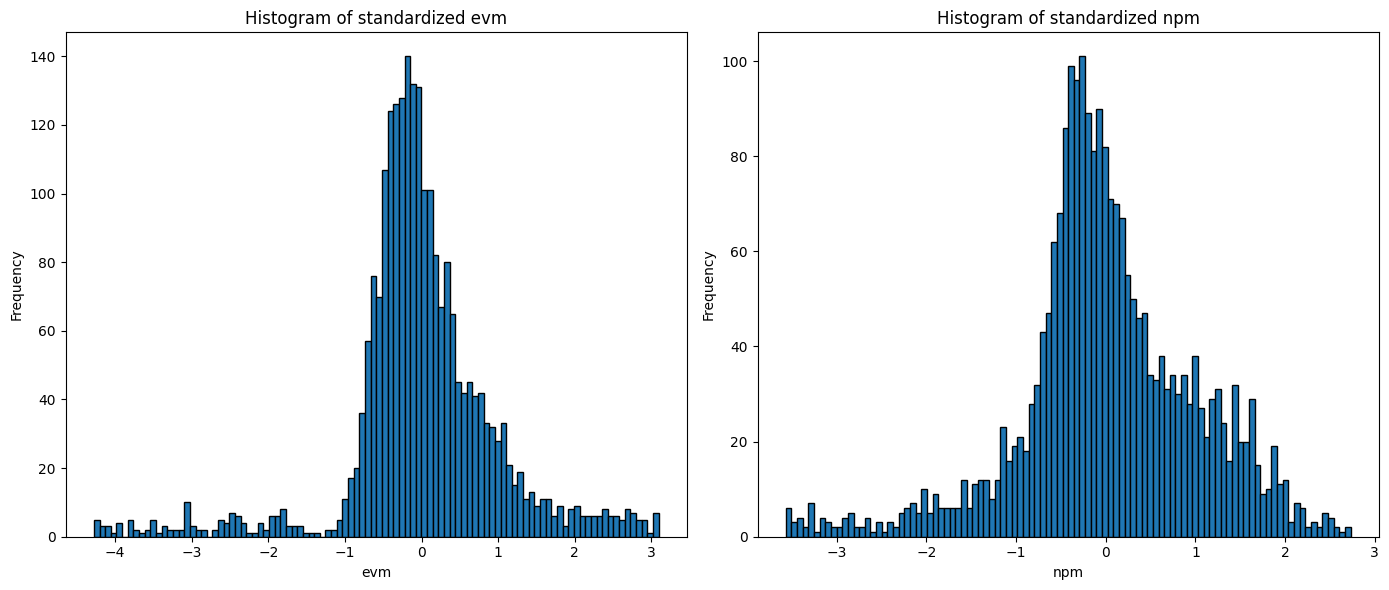

In [54]:
# Standardize the data
scaler = StandardScaler()
data_scaled_01_31 = scaler.fit_transform(df2_2020_01_31_features[['evm', 'npm']])

features_scaled_01_31 = pd.DataFrame(data_scaled_01_31, columns=['evm', 'npm'], index=tickers.index)

features_scaled_01_31['TICKER'] = tickers

# Plot histograms to explore the best range as a good indication to filter the dataset

hist_variables = ['evm', 'npm']

# Create 1x2 subplot map
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot histograms
for idx, var in enumerate(hist_variables):
    axes[idx].hist(features_scaled_01_31[var], bins=100, edgecolor='black')
    axes[idx].set_title(f'Histogram of standardized {var}')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

C:\Users\24211\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\24211\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\24211\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


Cluster: 1, Inertia: 4748.0
Cluster: 2, Inertia: 3176.98254683866
Cluster: 3, Inertia: 2142.538224790118


C:\Users\24211\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\24211\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\24211\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


Cluster: 4, Inertia: 1448.3228881422028
Cluster: 5, Inertia: 1183.5820353245476
Cluster: 6, Inertia: 994.5490092712963
Cluster: 7, Inertia: 878.5922263152418


C:\Users\24211\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\24211\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


Cluster: 8, Inertia: 784.8033738553094
Cluster: 9, Inertia: 709.3781515935102


C:\Users\24211\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\24211\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


Cluster: 10, Inertia: 648.9079019102415


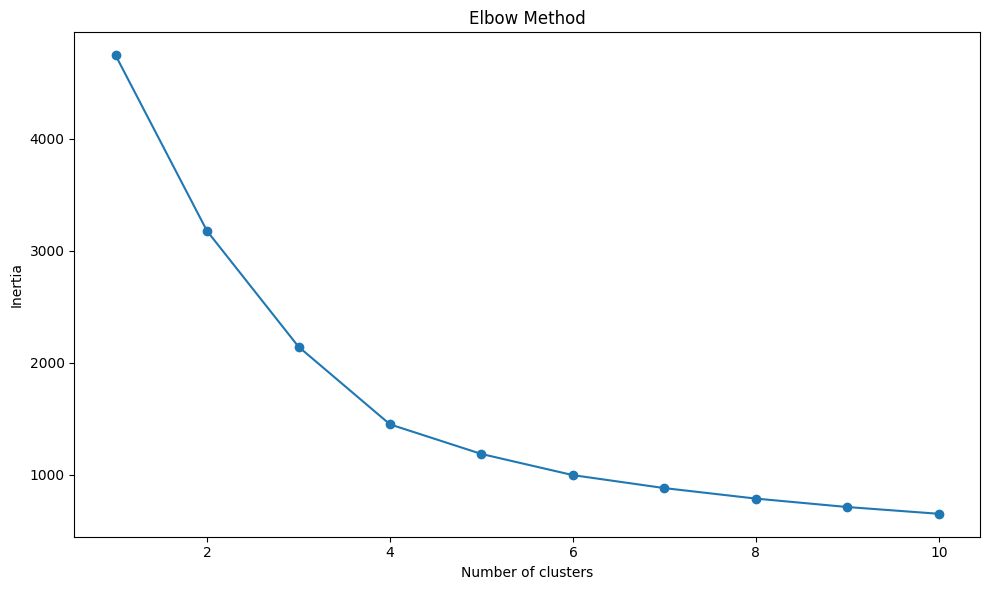

In [55]:
# 2. K-means clustering - Elbow plot
inertia = []
for n in range(1, 11):
    try:
        kmeans = KMeans(n_clusters=n, n_init=10, random_state=42)
        kmeans.fit(features_scaled_01_31[['evm', 'npm']])
        inertia.append(kmeans.inertia_)
        print(f"Cluster: {n}, Inertia: {kmeans.inertia_}")  # This will print the inertia for each cluster number
    except Exception as e:
        print(f"An error occurred at n_clusters={n}: {e}")  # This will print the error if one occurs

# Continue to plot only if the loop was successful
if len(inertia) == 10:
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.tight_layout()
    #plt.savefig('elbow_plot.png')  # Save the elbow plot
    #plt.close()
else:
    print("The loop did not complete successfully, check the errors above.")

C:\Users\24211\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


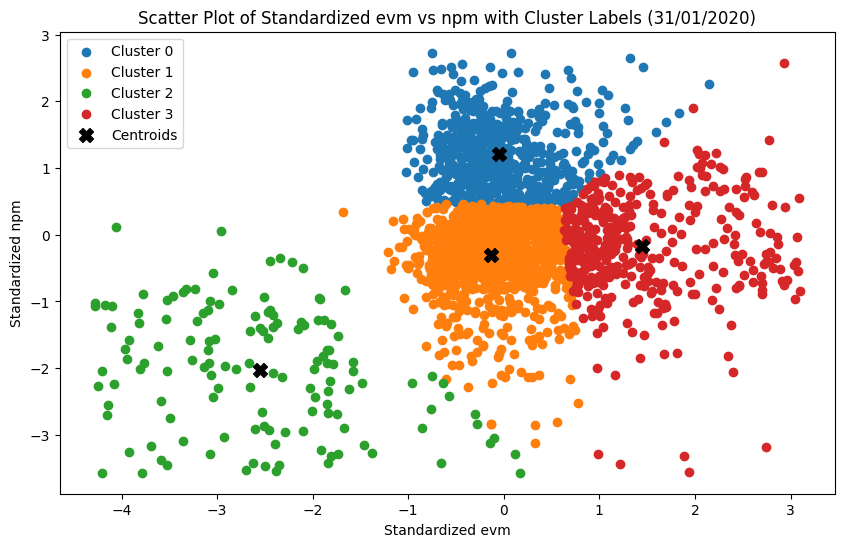

In [56]:
# Perform k-means clustering with k=4 on the standardized data
kmeans_01_31 = KMeans(n_clusters=4, n_init=10, random_state=42)
cluster_labels_01_31 = kmeans_01_31.fit_predict(features_scaled_01_31[['evm', 'npm']])  

# Get centroids
centroids_01_31 = kmeans_01_31.cluster_centers_

# Define a mapping for cluster numbers
cluster_mapping = {0: 1, 1: 2, 2: 3}

# Plotting the scatterplot with different colors for each cluster
plt.figure(figsize=(10, 6))
for i in range(4):  # k=4
    plt.scatter(features_scaled_01_31.loc[cluster_labels_01_31 == i, 'evm'], 
                features_scaled_01_31.loc[cluster_labels_01_31 == i, 'npm'],
                label=f'Cluster {i}')

# Plot centroids
plt.scatter(centroids_01_31[:, 0], centroids_01_31[:, 1], s=100, marker='X', c='black', label='Centroids')

plt.title('Scatter Plot of Standardized evm vs npm with Cluster Labels (31/01/2020)')
plt.xlabel('Standardized evm')
plt.ylabel('Standardized npm')
plt.legend()

# Create the directory if it does not exist
#output_dir = 'cluster'
#if not os.path.exists(output_dir):
#    os.makedirs(output_dir)

# Define the full path including the directory and file name
# file_path = os.path.join(output_dir, 'Scatter Plot of Standardized evm vs npm with Cluster Labels (31_01_2020).png')

plt.savefig('Scatter Plot of Standardized evm vs npm with Cluster Labels (31_01_2020).png')
plt.show()

### Silhouette_score for filtered_scaled_features

In [57]:
from sklearn.metrics import silhouette_score
silhouette_features_01_31 = features_scaled_01_31[['evm', 'npm']]  # Ensure this matches the feature set used in clustering

# Calculate the silhouette score
sil_score_01_31 = silhouette_score(silhouette_features_01_31, cluster_labels_01_31)

# Print the silhouette score
print("Silhouette Score: ", sil_score_01_31)

Silhouette Score:  0.4333911825158199


## Cluster Sizes: Report the size of each cluster (i.e., the number of securities falling into each cluster).

In [58]:
# adding the cluster label to k-means data
features_scaled_01_31.loc[:,'cluster'] = cluster_labels_01_31

print(features_scaled_01_31['cluster'].value_counts())

cluster
1    1249
0     605
3     382
2     138
Name: count, dtype: int64


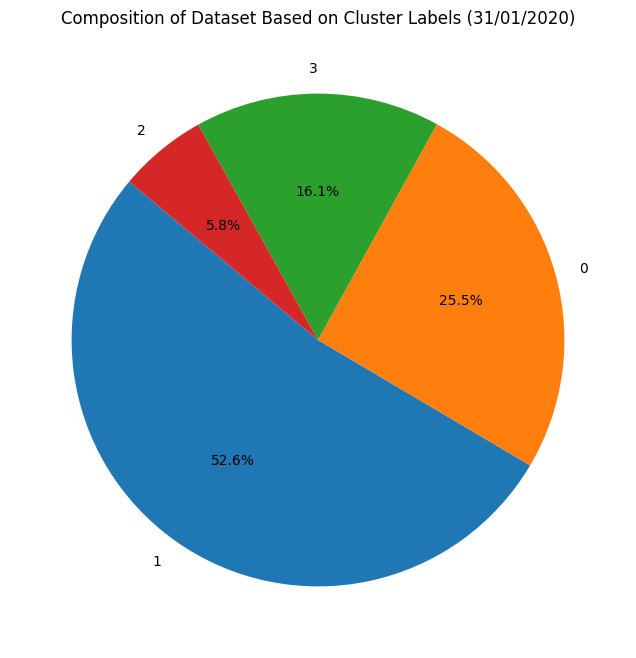

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each cluster
cluster_counts = features_scaled_01_31['cluster'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Composition of Dataset Based on Cluster Labels (31/01/2020)')
# plt.savefig('Composition of Dataset Based on Cluster Labels (31/01/2020).png')
plt.show()

### Mean evm and npm by cluster

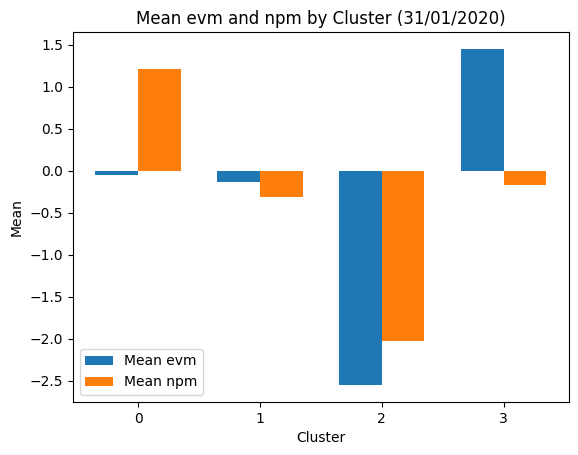

In [60]:
import matplotlib.pyplot as plt


# Grouped mean evm and npm
grouped_mean_evm = features_scaled_01_31.groupby('cluster')['evm'].mean()
grouped_mean_npm = features_scaled_01_31.groupby('cluster')['npm'].mean()

# Plotting
fig, ax = plt.subplots()
bar_width = 0.35
clusters = range(len(grouped_mean_evm))  # Using simple integer index

# Plotting evm
ax.bar([x - bar_width/2 for x in clusters], grouped_mean_evm, color='tab:blue', width=bar_width, label='Mean evm')
# Plotting npm
ax.bar([x + bar_width/2 for x in clusters], grouped_mean_npm, color='tab:orange', width=bar_width, label='Mean npm')

# Adding labels, title, and legend
ax.set_xlabel('Cluster')
ax.set_ylabel('Mean')
ax.set_title('Mean evm and npm by Cluster (31/01/2020)')
ax.set_xticks(clusters)
ax.set_xticklabels(grouped_mean_evm.index)  # Setting X-axis labels to original cluster labels
ax.legend()

# Display the plot
#plt.savefig('Mean evm and npm by Cluster (31/01/2020).png')
plt.show()


# As of end of 30/06/2020

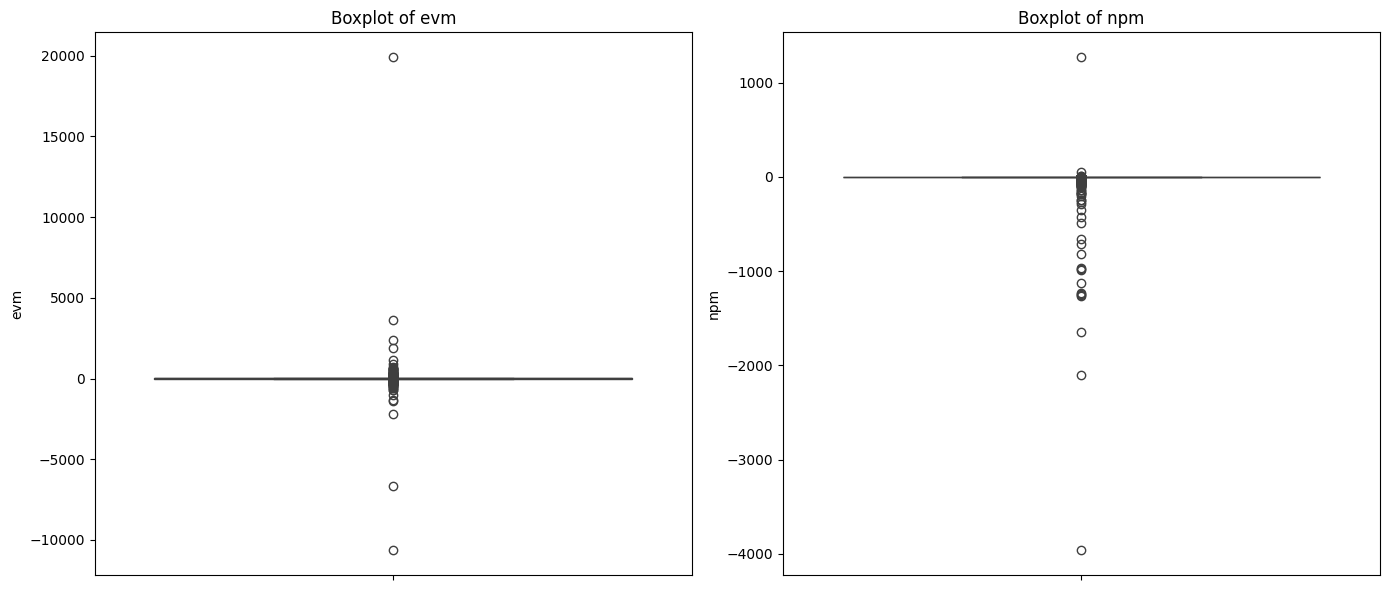

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns of interest and drop NaNs
df2_2020_06_30_boxplot = df2_2020_06_30[['evm', 'npm']].dropna()

df2_2020_06_30_boxplot_variables = ['evm', 'npm']

# Create 1x2 subplot map
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot boxplots
for idx, var in enumerate(df2_2020_06_30_boxplot_variables):
    sns.boxplot(y=df2_2020_06_30_boxplot[var], ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {var}')

# Display the plots
plt.tight_layout()
plt.show()

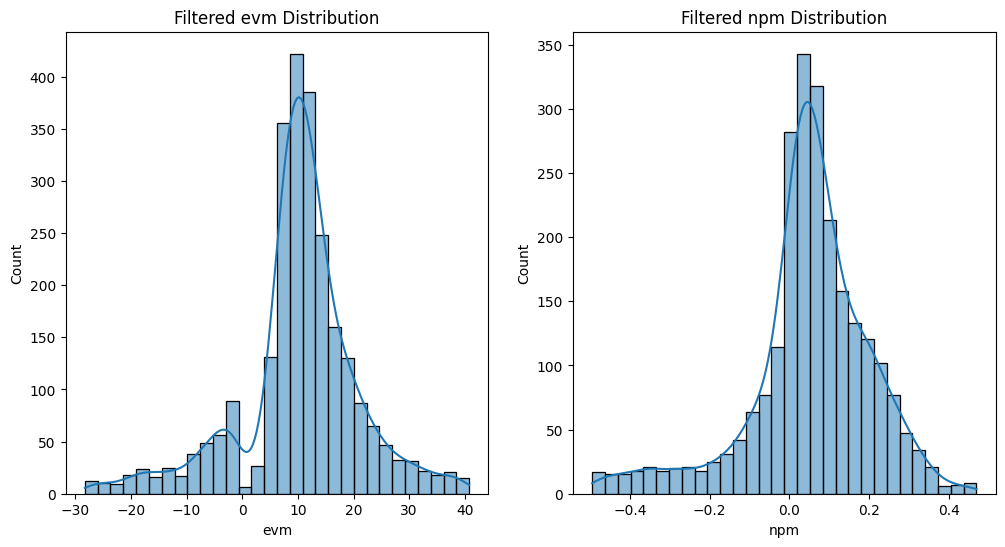

               CAPEI           bm          evm       pe_exi          dpr  \
count    2531.000000  2466.000000  2566.000000  2521.000000  1910.000000   
mean      -12.572812     1.177372    10.335258    12.109902     0.691906   
std      2338.008203     2.326089    10.686700    58.320122     6.221795   
min   -111450.000000     0.001000   -28.288000  -363.500000    -3.719000   
25%        -0.531500     0.368250     7.083250    -1.855000     0.000000   
50%        13.436000     0.770500    10.722000    11.046000     0.252000   
75%        26.748000     1.318750    15.262250    22.545000     0.517750   
max     26912.800000    57.079000    40.788000   350.333000   249.540000   

               npm          roa          roe         roce          ptb  \
count  2386.000000  2563.000000  2457.000000  2558.000000  2466.000000   
mean      0.050760     0.023829    -0.120922    -0.058412     3.850187   
std       0.154395     0.297596     2.259857     3.285057     8.095963   
min      -0.495000 

In [62]:
# Check and handle outliers (use appropriate method based on data distribution)
# For example: Use the Interquartile Range (IQR) method to detect and handle outliers
Q1 = df2_2020_06_30[['evm', 'npm']].quantile(0.25)
Q3 = df2_2020_06_30[['evm', 'npm']].quantile(0.75)
IQR = Q3 - Q1

# Align the columns before filtering outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df2_2020_06_30_filtered = df2_2020_06_30[~((df2_2020_06_30[['evm', 'npm']] < lower_bound) | (df2_2020_06_30[['evm', 'npm']] > upper_bound)).any(axis=1)]

# Recheck data distribution after cleaning
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df2_2020_06_30_filtered['evm'].dropna(), bins=30, kde=True)
plt.title('Filtered evm Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df2_2020_06_30_filtered['npm'].dropna(), bins=30, kde=True)
plt.title('Filtered npm Distribution')
plt.show()

# Final check of cleaned data
print(df2_2020_06_30_filtered.describe())

In [63]:
# Replace instances of evm = 0 and npm = 0 with NaN, 
# because 0 in these variables are more likely caused by inputting or accounting mistakes 

df2_2020_06_30_filtered.loc[df2_2020_06_30_filtered['evm'] == 0, 'evm'] = np.nan
df2_2020_06_30_filtered.loc[df2_2020_06_30_filtered['npm'] == 0, 'npm'] = np.nan

df2_2020_06_30_filtered = df2_2020_06_30_filtered[['evm', 'npm', 'TICKER']].dropna()

tickers = df2_2020_06_30_filtered['TICKER']


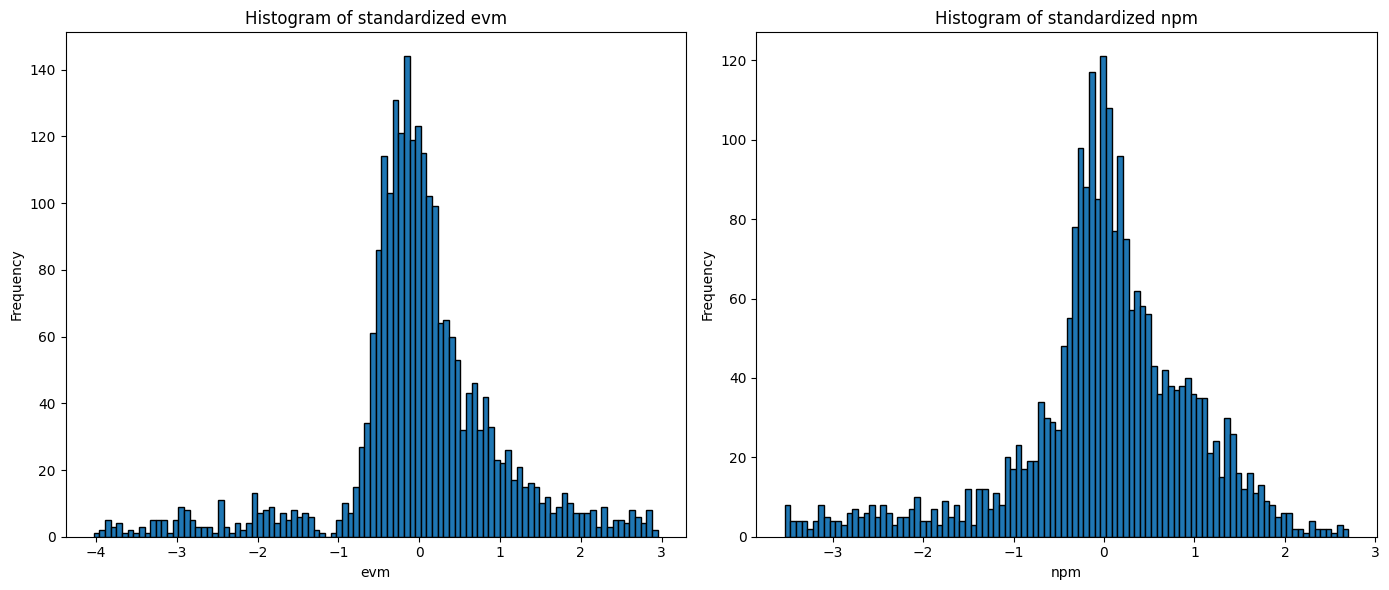

In [64]:
# Standardize the data
scaler = StandardScaler()
data_scaled_06_30 = scaler.fit_transform(df2_2020_06_30_filtered[['evm', 'npm']])

features_scaled_06_30 = pd.DataFrame(data_scaled_06_30, columns=['evm', 'npm'], index=tickers.index)

features_scaled_06_30['TICKER'] = tickers

# Plot histograms to explore the best range as a good indication to filter the dataset

hist_variables = ['evm', 'npm']

# Create 1x2 subplot map
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot histograms
for idx, var in enumerate(hist_variables):
    axes[idx].hist(features_scaled_06_30[var], bins=100, edgecolor='black')
    axes[idx].set_title(f'Histogram of standardized {var}')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

C:\Users\24211\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\24211\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\24211\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


Cluster: 1, Inertia: 4746.0
Cluster: 2, Inertia: 2802.633295651322
Cluster: 3, Inertia: 2035.6168348272358


C:\Users\24211\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\24211\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


Cluster: 4, Inertia: 1468.8974683539
Cluster: 5, Inertia: 1202.622937578581


C:\Users\24211\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\24211\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


Cluster: 6, Inertia: 1053.5931280886027
Cluster: 7, Inertia: 920.8921010047845


C:\Users\24211\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\24211\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


Cluster: 8, Inertia: 804.6889348111581
Cluster: 9, Inertia: 719.0949870716232


C:\Users\24211\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


Cluster: 10, Inertia: 658.1707933872572


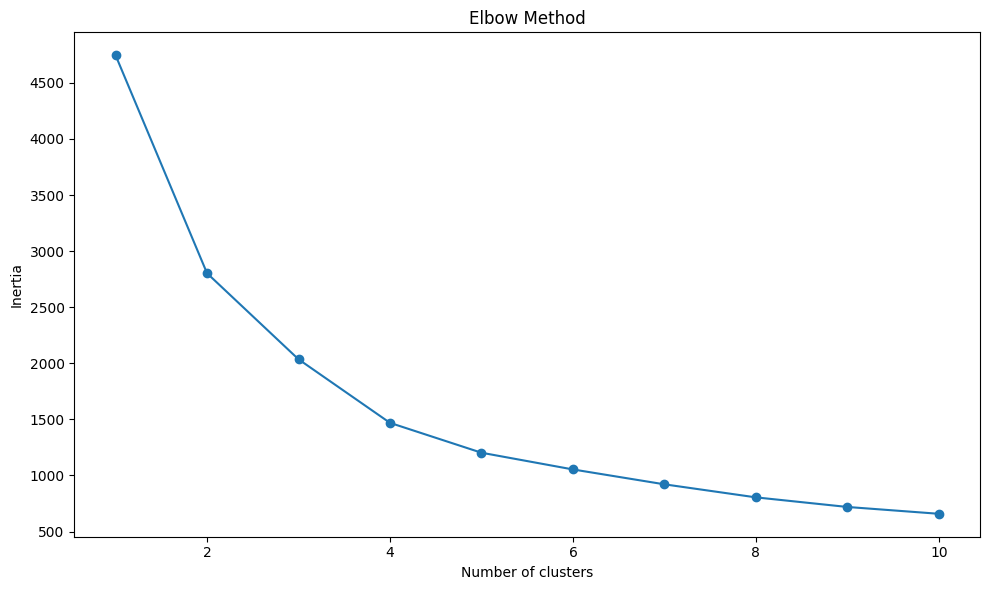

In [65]:
# 2. K-means clustering - Elbow plot
inertia = []
for n in range(1, 11):
    try:
        kmeans = KMeans(n_clusters=n, n_init=10, random_state=42)
        kmeans.fit(features_scaled_06_30[['evm', 'npm']])
        inertia.append(kmeans.inertia_)
        print(f"Cluster: {n}, Inertia: {kmeans.inertia_}")  # This will print the inertia for each cluster number
    except Exception as e:
        print(f"An error occurred at n_clusters={n}: {e}")  # This will print the error if one occurs

# Continue to plot only if the loop was successful
if len(inertia) == 10:
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.tight_layout()
    #plt.savefig('elbow_plot.png')  # Save the elbow plot
    #plt.close()
else:
    print("The loop did not complete successfully, check the errors above.")

C:\Users\24211\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\24211\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


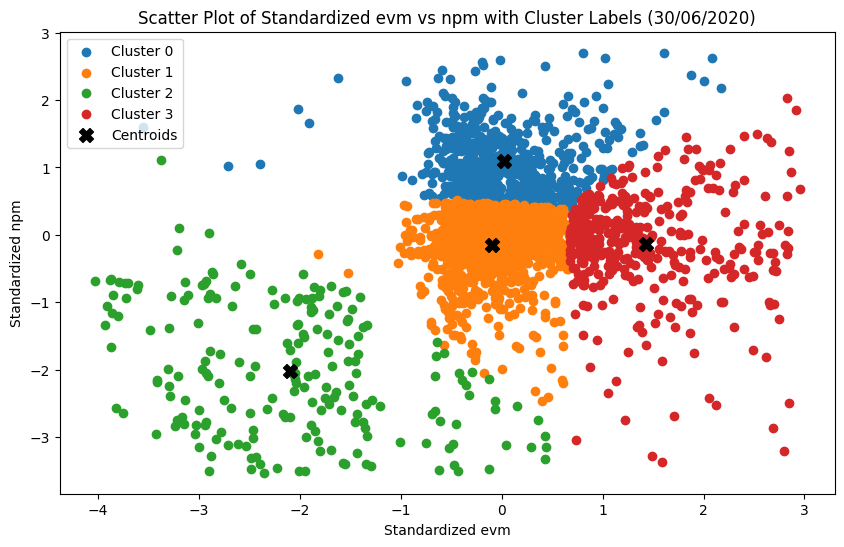

In [66]:
# Perform k-means clustering with k=4 on the standardized data
kmeans_06_30 = KMeans(n_clusters=4, init = centroids_01_31, n_init=10, random_state=42)
cluster_labels_06_30 = kmeans_06_30.fit_predict(features_scaled_06_30[['evm', 'npm']])  

# Get centroids
centroids = kmeans_06_30.cluster_centers_

# Define a mapping for cluster numbers
cluster_mapping = {0: 1, 1: 2, 2: 3}

# Plotting the scatterplot with different colors for each cluster
plt.figure(figsize=(10, 6))
for i in range(4):  # k=4
    plt.scatter(features_scaled_06_30.loc[cluster_labels_06_30 == i, 'evm'], 
                features_scaled_06_30.loc[cluster_labels_06_30 == i, 'npm'],
                label=f'Cluster {i}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, marker='X', c='black', label='Centroids')

plt.title('Scatter Plot of Standardized evm vs npm with Cluster Labels (30/06/2020)')
plt.xlabel('Standardized evm')
plt.ylabel('Standardized npm')
plt.legend()
#plt.savefig('Scatter Plot of Standardized evm vs npm with Cluster Labels (30/06/2020).png')
plt.show()

### Silhouette_score for filtered_scaled_features

In [67]:
from sklearn.metrics import silhouette_score
silhouette_features_06_30 = features_scaled_06_30[['evm', 'npm']]  # Ensure this matches the feature set used in clustering

# Calculate the silhouette score
sil_score_06_30 = silhouette_score(silhouette_features_06_30, cluster_labels_06_30)

# Print the silhouette score
print("Silhouette Score: ", sil_score_06_30)

Silhouette Score:  0.4090419333020226


## Cluster Sizes: Report the size of each cluster (i.e., the number of securities falling into each cluster).

In [68]:
# adding the cluster label to k-means data
features_scaled_06_30.loc[:,'cluster'] = cluster_labels_06_30

print(features_scaled_06_30['cluster'].value_counts())

cluster
1    1202
0     591
3     373
2     207
Name: count, dtype: int64


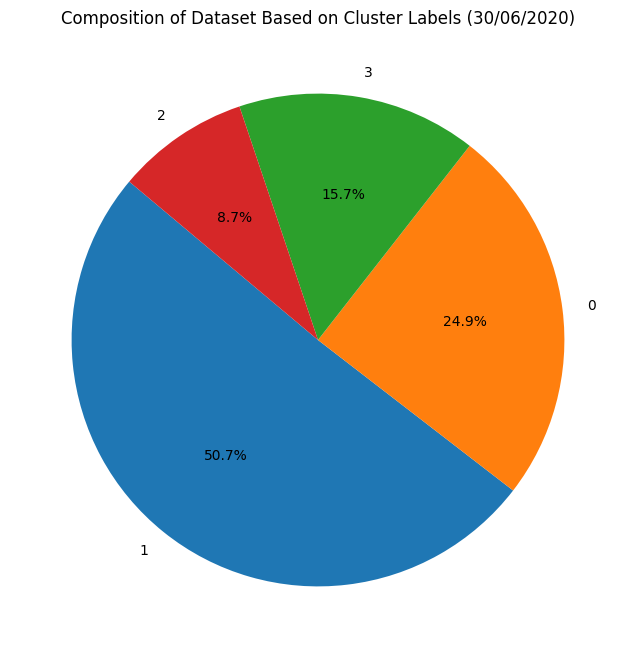

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each cluster
cluster_counts = features_scaled_06_30['cluster'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Composition of Dataset Based on Cluster Labels (30/06/2020)')
#plt.savefig('Composition of Dataset Based on Cluster Labels (30/06/2020).png')
plt.show()

## Mean evm and npm by cluster

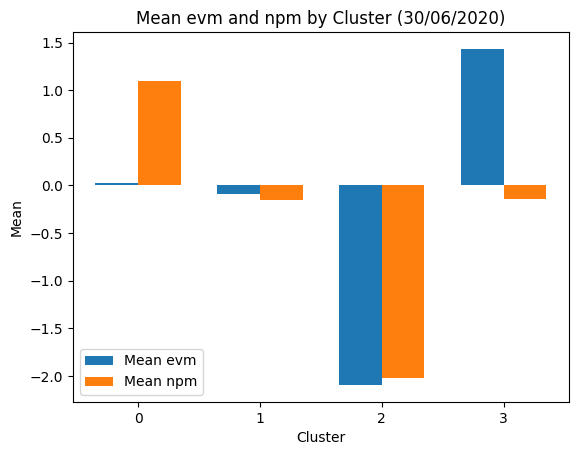

In [70]:
import matplotlib.pyplot as plt

# Grouped mean evm and npm
grouped_mean_evm = features_scaled_06_30.groupby('cluster')['evm'].mean()
grouped_mean_npm = features_scaled_06_30.groupby('cluster')['npm'].mean()

# Plotting
fig, ax = plt.subplots()
bar_width = 0.35
clusters = range(len(grouped_mean_evm))  # Using simple integer index

# Plotting evm
ax.bar([x - bar_width/2 for x in clusters], grouped_mean_evm, color='tab:blue', width=bar_width, label='Mean evm')
# Plotting npm
ax.bar([x + bar_width/2 for x in clusters], grouped_mean_npm, color='tab:orange', width=bar_width, label='Mean npm')

# Adding labels, title, and legend
ax.set_xlabel('Cluster')
ax.set_ylabel('Mean')
ax.set_title('Mean evm and npm by Cluster (30/06/2020)')
ax.set_xticks(clusters)
ax.set_xticklabels(grouped_mean_evm.index)  # Setting X-axis labels to original cluster labels
ax.legend()

# Display the plot
#plt.savefig('Mean evm and npm by Cluster (30/06/2020).png')
plt.show()


# <center>Task 5</center> #

In [71]:
import pandas as pd
import numpy as np

# Read Stock_data_part3 in the CSV file without specifying a dtype

df_3 = pd.read_csv('Stock_data_part3.csv',low_memory=True)

# Convert 'date' column to datetime if it's not already done by parse_dates

df_3['date'] = pd.to_datetime(df_3['date'], errors='coerce')

df_3

,PERMNO,date,SHRCD,TICKER,PERMCO,CUSIP,HSICIG,PRC,VOL,RET,SHROUT,SPREAD
0,10001,2010-01-29,11.0,EGAS,7953,36720410,NaN,10.06000,3104.0,-0.018932,4361.0,NaN
1,10001,2010-02-26,11.0,EGAS,7953,36720410,NaN,10.00840,1510.0,-0.000656,4361.0,NaN
2,10001,2010-03-31,11.0,EGAS,7953,36720410,NaN,10.17000,2283.0,0.020643,4361.0,NaN
3,10001,2010-04-30,11.0,EGAS,7953,36720410,NaN,11.39000,3350.0,0.124385,6070.0,NaN
4,10001,2010-05-28,11.0,EGAS,7953,36720410,NaN,11.40000,3451.0,0.004829,6071.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1176723,93436,2022-08-31,11.0,TSLA,53453,88160R10,NaN,275.60999,7322218.0,-0.072489,3133470.0,NaN
1176724,93436,2022-09-30,11.0,TSLA,53453,88160R10,NaN,265.25000,12965500.0,-0.037589,3158000.0,NaN
1176725,93436,2022-10-31,11.0,TSLA,53453,88160R10,NaN,227.53999,17325849.0,-0.142168,3157752.0,NaN
1176726,93436,2022-11-30,11.0,TSLA,53453,88160R10,NaN,194.70000,18824244.0,-0.144326,3157752.0,NaN


# Merge with the stock data part2

In [72]:
# Read Stock_data_part2 in the CSV file without specifying a dtype

df_2 = pd.read_csv('Stock_data_part2.csv', low_memory=True)

# Convert 'date' column to datetime if it's not already done by parse_dates

df_2['date'] = pd.to_datetime(df_2['public_date'], dayfirst=True, errors='coerce')

In [73]:
import pandas as pd

df_2 = df_2.sort_values(by=['TICKER','date'])

df_3 = df_3.sort_values(by=['TICKER','date'])


# 
df_2_and_3 = pd.merge(df_3, df_2[['TICKER', 'date', 'CAPEI', 'bm', 'evm', 'pe_exi', 'dpr', 
                          'npm', 'roa','roe','roce', 'ptb', 'divyield' ]], on=['TICKER', 'date'], how='left')

df_2_and_3

,PERMNO,date,SHRCD,TICKER,PERMCO,CUSIP,HSICIG,PRC,VOL,RET,...,bm,evm,pe_exi,dpr,npm,roa,roe,roce,ptb,divyield
0,87432,2010-01-29,11.0,A,36364,00846U10,NaN,28.03,571968.0,-0.097844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,87432,2010-02-26,11.0,A,36364,00846U10,NaN,31.46,774480.0,0.122369,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,87432,2010-03-31,11.0,A,36364,00846U10,NaN,34.39,859463.0,0.093134,...,0.266,19.349,-332.0,NaN,-0.004,0.079,-0.006,0.081,4.623,NaN
3,87432,2010-04-30,11.0,A,36364,00846U10,NaN,36.26,760232.0,0.054376,...,0.266,19.349,-393.0,NaN,-0.004,0.079,-0.006,0.081,4.874,NaN
4,87432,2010-05-28,11.0,A,36364,00846U10,NaN,32.36,892074.0,-0.107556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973217,23677,2022-12-30,NaN,NaN,59443,72942P10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973218,23678,2022-12-30,NaN,NaN,59477,74767N10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973219,23679,2022-12-30,NaN,NaN,59478,83094010,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973220,23680,2022-12-30,NaN,NaN,56315,53656G55,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Merge df_3_dropna with Fama-French 5 factors data into a new dataset

In [74]:
# Read the CSV file
df_F_F_m = pd.read_csv('F-F_Research_Data_5_Factors_2x3 Monthly.csv', low_memory=False)

# Convert 'date' column to datetime if it's not already done by parse_dates
from datetime import datetime

# Convert the 'Date' column to datetime objects
df_F_F_m['date'] = pd.to_datetime(df_F_F_m['Date'], format='%Y%m', errors='coerce')

# Extract year and month into a new column
df_F_F_m['date'] = df_F_F_m['date'].dt.strftime('%Y-%m')

# Drop the original column 'Date' which is in string format
df_F_F_m.drop(columns=['Date'], inplace=True)

df_F_F_m

,Mkt-RF,SMB,HML,RMW,CMA,RF,date
0,-0.39,-0.41,-0.97,0.68,-1.18,0.27,1963-07
1,5.07,-0.80,1.80,0.36,-0.35,0.25,1963-08
2,-1.57,-0.52,0.13,-0.71,0.29,0.27,1963-09
3,2.53,-1.39,-0.10,2.80,-2.01,0.29,1963-10
4,-0.85,-0.88,1.75,-0.51,2.24,0.27,1963-11
...,...,...,...,...,...,...,...
724,8.84,-0.12,1.64,-3.91,-1.00,0.44,2023-11
725,4.87,7.32,4.93,-3.07,1.32,0.43,2023-12
726,0.71,-5.74,-2.38,0.69,-0.96,0.47,2024-01
727,5.06,-0.78,-3.49,-1.99,-2.14,0.42,2024-02


In [75]:
import pandas as pd

# Convert the 'date' column to datetime objects
df_2_and_3['date'] = pd.to_datetime(df_2_and_3['date'], errors='coerce')

# Check the conversion
print(df_2_and_3['date'].dtypes)

# Extract year and month, create a new column 'Date'
df_2_and_3.loc[:, 'Date'] = df_2_and_3['date'].dt.strftime('%Y-%m')

# Verify new column 'Date'
print(df_2_and_3[['date', 'Date']].head())

df_2_and_3

datetime64[ns]
        date     Date
0 2010-01-29  2010-01
1 2010-02-26  2010-02
2 2010-03-31  2010-03
3 2010-04-30  2010-04
4 2010-05-28  2010-05


,PERMNO,date,SHRCD,TICKER,PERMCO,CUSIP,HSICIG,PRC,VOL,RET,...,evm,pe_exi,dpr,npm,roa,roe,roce,ptb,divyield,Date
0,87432,2010-01-29,11.0,A,36364,00846U10,NaN,28.03,571968.0,-0.097844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01
1,87432,2010-02-26,11.0,A,36364,00846U10,NaN,31.46,774480.0,0.122369,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-02
2,87432,2010-03-31,11.0,A,36364,00846U10,NaN,34.39,859463.0,0.093134,...,19.349,-332.0,NaN,-0.004,0.079,-0.006,0.081,4.623,NaN,2010-03
3,87432,2010-04-30,11.0,A,36364,00846U10,NaN,36.26,760232.0,0.054376,...,19.349,-393.0,NaN,-0.004,0.079,-0.006,0.081,4.874,NaN,2010-04
4,87432,2010-05-28,11.0,A,36364,00846U10,NaN,32.36,892074.0,-0.107556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973217,23677,2022-12-30,NaN,NaN,59443,72942P10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12
1973218,23678,2022-12-30,NaN,NaN,59477,74767N10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12
1973219,23679,2022-12-30,NaN,NaN,59478,83094010,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12
1973220,23680,2022-12-30,NaN,NaN,56315,53656G55,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12


In [76]:
# Drop the 'date' column
df_2_and_3_copy = df_2_and_3.copy()

df_2_and_3_copy.drop(columns=['date'], inplace=True)

df_2_and_3_copy

,PERMNO,SHRCD,TICKER,PERMCO,CUSIP,HSICIG,PRC,VOL,RET,SHROUT,...,evm,pe_exi,dpr,npm,roa,roe,roce,ptb,divyield,Date
0,87432,11.0,A,36364,00846U10,NaN,28.03,571968.0,-0.097844,348892.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-01
1,87432,11.0,A,36364,00846U10,NaN,31.46,774480.0,0.122369,348892.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-02
2,87432,11.0,A,36364,00846U10,NaN,34.39,859463.0,0.093134,348146.0,...,19.349,-332.0,NaN,-0.004,0.079,-0.006,0.081,4.623,NaN,2010-03
3,87432,11.0,A,36364,00846U10,NaN,36.26,760232.0,0.054376,348146.0,...,19.349,-393.0,NaN,-0.004,0.079,-0.006,0.081,4.874,NaN,2010-04
4,87432,11.0,A,36364,00846U10,NaN,32.36,892074.0,-0.107556,348146.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973217,23677,NaN,NaN,59443,72942P10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12
1973218,23678,NaN,NaN,59477,74767N10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12
1973219,23679,NaN,NaN,59478,83094010,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12
1973220,23680,NaN,NaN,56315,53656G55,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12


In [77]:
# Rename 'Date' to 'date' in df_3_dropna_copy
df_2_and_3_copy.rename(columns={'Date': 'date'}, inplace=True)

# Merge two datasets
df_5_merge = pd.merge(df_2_and_3_copy, df_F_F_m[['date', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']], on=['date'], how='left')

# set 'date' as index column
# df_5_merge.set_index('date', inplace=True)

df_5_merge

,PERMNO,SHRCD,TICKER,PERMCO,CUSIP,HSICIG,PRC,VOL,RET,SHROUT,...,roce,ptb,divyield,date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,87432,11.0,A,36364,00846U10,NaN,28.03,571968.0,-0.097844,348892.0,...,NaN,NaN,NaN,2010-01,-3.36,0.34,0.43,-1.27,0.46,0.00
1,87432,11.0,A,36364,00846U10,NaN,31.46,774480.0,0.122369,348892.0,...,NaN,NaN,NaN,2010-02,3.40,1.51,3.23,-0.27,1.43,0.00
2,87432,11.0,A,36364,00846U10,NaN,34.39,859463.0,0.093134,348146.0,...,0.081,4.623,NaN,2010-03,6.31,1.85,2.21,-0.65,1.69,0.01
3,87432,11.0,A,36364,00846U10,NaN,36.26,760232.0,0.054376,348146.0,...,0.081,4.874,NaN,2010-04,2.00,4.98,2.89,0.69,1.72,0.01
4,87432,11.0,A,36364,00846U10,NaN,32.36,892074.0,-0.107556,348146.0,...,NaN,NaN,NaN,2010-05,-7.89,0.04,-2.44,1.30,-0.21,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973217,23677,NaN,NaN,59443,72942P10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-12,-6.41,-0.15,1.37,0.25,4.20,0.33
1973218,23678,NaN,NaN,59477,74767N10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-12,-6.41,-0.15,1.37,0.25,4.20,0.33
1973219,23679,NaN,NaN,59478,83094010,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-12,-6.41,-0.15,1.37,0.25,4.20,0.33
1973220,23680,NaN,NaN,56315,53656G55,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-12,-6.41,-0.15,1.37,0.25,4.20,0.33


In [78]:
df_5_merge.columns

Index(['PERMNO', 'SHRCD', 'TICKER', 'PERMCO', 'CUSIP', 'HSICIG', 'PRC', 'VOL',
       'RET', 'SHROUT', 'SPREAD', 'CAPEI', 'bm', 'evm', 'pe_exi', 'dpr', 'npm',
       'roa', 'roe', 'roce', 'ptb', 'divyield', 'date', 'Mkt-RF', 'SMB', 'HML',
       'RMW', 'CMA', 'RF'],
      dtype='object')

In [79]:
# Function to print non-numeric values for each numeric column

def check_numeric(column_name):
    non_numeric = df_5_merge[pd.to_numeric(df_5_merge[column_name], errors='coerce').isna()][column_name].unique()
    print(f"Non-numeric values in {column_name}: {non_numeric}")

# List of columns to check, replace these with your actual column names

columns_to_check = ['PRC', 'VOL',
       'RET', 'SHROUT', 'SPREAD', 'CAPEI', 'bm', 'evm', 'pe_exi', 'dpr', 'npm',
       'roa', 'roe', 'roce', 'ptb', 'divyield', 'Mkt-RF', 'SMB', 'HML', 'RMW',
       'CMA', 'RF']

# Check each column for non-numeric values

for column in columns_to_check:
    check_numeric(column)


Non-numeric values in PRC: [nan]
Non-numeric values in VOL: [nan]
Non-numeric values in RET: ['C' nan 'B']
Non-numeric values in SHROUT: [nan]
Non-numeric values in SPREAD: [nan]
Non-numeric values in CAPEI: [nan]
Non-numeric values in bm: [nan]
Non-numeric values in evm: [nan]
Non-numeric values in pe_exi: [nan]
Non-numeric values in dpr: [nan]
Non-numeric values in npm: [nan]
Non-numeric values in roa: [nan]
Non-numeric values in roe: [nan]
Non-numeric values in roce: [nan]
Non-numeric values in ptb: [nan]
Non-numeric values in divyield: [nan '0.95%' '0.98%' ... '42.50%' '58.70%' '54.70%']
Non-numeric values in Mkt-RF: []
Non-numeric values in SMB: []
Non-numeric values in HML: []
Non-numeric values in RMW: []
Non-numeric values in CMA: []
Non-numeric values in RF: []


In [80]:
# Convert the following columns to be numeric

numeric_columns = ['PRC', 'VOL',
       'RET', 'SHROUT', 'SPREAD', 'CAPEI', 'bm', 'evm', 'pe_exi', 'dpr', 'npm',
       'roa', 'roe', 'roce', 'ptb', 'divyield', 'Mkt-RF', 'SMB', 'HML', 'RMW',
       'CMA', 'RF']
for column in numeric_columns:
    df_5_merge.loc[:, column] = pd.to_numeric(df_5_merge[column], errors='coerce')

In [81]:
import numpy as np

# Read the variable specifications and pick out any strange values that we need to specify as missing

# Check for duplicate indices and reset the index if duplicates exist
#if df_5_merge.index.duplicated().any():
#    df_5_merge = df_5_merge.reset_index(drop=False)
    
# prc -> replace with abs(prc) if prc < 0
df_5_merge.loc[df_5_merge['PRC'] < 0, 'PRC'] = df_5_merge['PRC'].abs()

# prc -> set to NaN if prc = 0
df_5_merge.loc[df_5_merge['PRC'] == 0, 'PRC'] = np.nan

# ret -> set to NaN if ret is -66, -77, -88, or -99
df_5_merge.loc[df_5_merge['RET'].isin([-66, -77, -88, -99]), 'RET'] = np.nan

# ret -> set to NaN if ret is 'B' or 'C'
df_5_merge.loc[df_5_merge['RET'] == 'B', 'RET'] = np.nan
df_5_merge.loc[df_5_merge['RET'] == 'C', 'RET'] = np.nan

# if SPREAD = NaN then set numtrd to 0
df_5_merge['SPREAD'].fillna(0, inplace=True)

# convert dtype of div yield
df_5_merge['divyield'] = df_5_merge['divyield'].str.replace('%', '', regex=True).astype(float) / 100

# CAPEI -> set to NaN if CAPEI <= 0 
df_5_merge.loc[df_5_merge['CAPEI'] <= 0] = np.nan

# evm -> set to NaN if evm = 0 
df_5_merge.loc[df_5_merge['evm'] == 0] = np.nan

# npm -> set to NaN if npm = 0 
df_5_merge.loc[df_5_merge['npm'] == 0] = np.nan

# pe_exi -> set to NaN if pe_exi == 0 
df_5_merge.loc[df_5_merge['pe_exi'] == 0] = np.nan

# ptb -> set to NaN if ptb = 0 
df_5_merge.loc[df_5_merge['ptb'] == 0] = np.nan

# Show the result
df_5_merge.columns

Index(['PERMNO', 'SHRCD', 'TICKER', 'PERMCO', 'CUSIP', 'HSICIG', 'PRC', 'VOL',
       'RET', 'SHROUT', 'SPREAD', 'CAPEI', 'bm', 'evm', 'pe_exi', 'dpr', 'npm',
       'roa', 'roe', 'roce', 'ptb', 'divyield', 'date', 'Mkt-RF', 'SMB', 'HML',
       'RMW', 'CMA', 'RF'],
      dtype='object')

In [82]:
# Drop duplicates based on 'PERMNO' and 'date' combination, keeping the first occurrence

df_5_merge_dp = df_5_merge.drop_duplicates(subset=['PERMNO', 'date'], keep='first')

# Verify the operation by checking for duplicates again

print(df_5_merge_dp[df_5_merge_dp.duplicated(subset=['PERMNO', 'date'], keep=False)])

Empty DataFrame
Columns: [PERMNO, SHRCD, TICKER, PERMCO, CUSIP, HSICIG, PRC, VOL, RET, SHROUT, SPREAD, CAPEI, bm, evm, pe_exi, dpr, npm, roa, roe, roce, ptb, divyield, date, Mkt-RF, SMB, HML, RMW, CMA, RF]
Index: []

[0 rows x 29 columns]


In [83]:
missing_values_count = df_5_merge_dp.isna().sum()

print("Missing values count for each variable:")
print(missing_values_count)

Missing values count for each variable:
PERMNO            1
SHRCD          8306
TICKER        17540
PERMCO            1
CUSIP             1
HSICIG      1016610
PRC           23440
VOL           18325
RET           32368
SHROUT         9035
SPREAD            1
CAPEI        790828
bm           779456
evm          775053
pe_exi       778809
dpr          806419
npm          778913
roa          775845
roe          785313
roce         776955
ptb          779456
divyield    1042594
date              1
Mkt-RF            1
SMB               1
HML               1
RMW               1
CMA               1
RF                1
dtype: int64


In [84]:
# Remove rows with missing values
df_5_merge_dropna = df_5_merge_dp.dropna(subset=['PERMNO', 'PRC', 'VOL', 'RET', 'SHROUT', 'SPREAD', 'CAPEI', 'bm', 'evm', 'pe_exi',
                                 'dpr','npm', 'roa', 'roe', 'roce', 'ptb', 'date', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA','RF'])

df_5_merge_dropna

,PERMNO,SHRCD,TICKER,PERMCO,CUSIP,HSICIG,PRC,VOL,RET,SHROUT,...,roce,ptb,divyield,date,Mkt-RF,SMB,HML,RMW,CMA,RF
5,87432.0,11.0,A,36364.0,00846U10,NaN,28.4300,727867.0,-0.121446,348063.0,...,0.107,3.771,NaN,2010-06,-5.57,-2.47,-4.70,-0.16,-1.55,0.01
7,87432.0,11.0,A,36364.0,00846U10,NaN,26.9700,757354.0,-0.034372,348063.0,...,0.107,3.577,NaN,2010-08,-4.77,-3.15,-1.90,0.53,-1.59,0.01
8,87432.0,11.0,A,36364.0,00846U10,NaN,33.3700,680557.0,0.237301,346370.0,...,0.134,4.125,NaN,2010-09,9.54,3.75,-3.16,-0.21,0.38,0.01
10,87432.0,11.0,A,36364.0,00846U10,NaN,35.0200,638490.0,0.006322,346370.0,...,0.134,4.329,NaN,2010-11,0.60,3.67,-0.96,0.45,1.59,0.01
11,87432.0,11.0,A,36364.0,00846U10,NaN,41.4300,744480.0,0.183038,347604.0,...,0.135,4.365,NaN,2010-12,6.82,1.03,3.70,-3.44,3.16,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160874,18418.0,11.0,ZYXI,56660.0,98986M10,NaN,8.9400,49032.0,0.041958,38407.0,...,0.274,4.976,NaN,2022-08,-3.77,1.52,0.29,-4.75,1.29,0.19
1160875,18418.0,11.0,ZYXI,56660.0,98986M10,NaN,9.0700,33792.0,0.014541,37467.0,...,0.274,4.924,NaN,2022-09,-9.35,-1.05,0.05,-1.51,-0.80,0.19
1160876,18418.0,11.0,ZYXI,56660.0,98986M10,NaN,11.4000,30718.0,0.256891,37453.0,...,0.274,6.187,NaN,2022-10,7.83,1.89,8.01,3.34,6.64,0.23
1160877,18418.0,11.0,ZYXI,56660.0,98986M10,NaN,13.7200,45442.0,0.203509,37453.0,...,0.244,7.883,NaN,2022-11,4.60,-2.74,1.38,6.38,3.18,0.29


In [85]:
# Excess Return

df_5_merge_dropna.loc[:,'ex_ret'] = df_5_merge_dropna['RET'] - df_5_merge_dropna['RF'] 

# Market Premium, using Mkt-RF from Fama-French 5 Factors

# Market Capitalization
df_5_merge_dropna.loc[:,'MktCap'] = df_5_merge_dropna['PRC'] * df_5_merge_dropna['SHROUT']

# Create variables about 'Dollar Volume'

df_5_merge_dropna.loc[:,'Dvol'] = df_5_merge_dropna['PRC'] * df_5_merge_dropna['VOL']
df_5_merge_dropna.loc[:,'dvol_mlnUSD'] = df_5_merge_dropna['Dvol'] / 1_000_000


C:\Users\24211\AppData\Local\Temp\ipykernel_39888\3718074521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5_merge_dropna.loc[:,'ex_ret'] = df_5_merge_dropna['RET'] - df_5_merge_dropna['RF']
C:\Users\24211\AppData\Local\Temp\ipykernel_39888\3718074521.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5_merge_dropna.loc[:,'MktCap'] = df_5_merge_dropna['PRC'] * df_5_merge_dropna['SHROUT']
C:\Users\24211\AppData\Local\Temp\ipykernel_39888\3718074521.py:12: SettingWithCopyWarning: 
A value is tryi

## Summary Statistics

In [86]:
# All numeric variables
all_variables = ['PRC', 'VOL',
       'RET', 'SHROUT', 'SPREAD', 'CAPEI', 'bm', 'evm', 'pe_exi', 'dpr', 'npm',
       'roa', 'roe', 'roce', 'ptb', 'divyield', 'Mkt-RF', 'SMB', 'HML',
       'RMW', 'CMA', 'RF', 'Dvol', 'dvol_mlnUSD', 'ex_ret', 'MktCap']

df_5_merge_dropna = df_5_merge_dropna[all_variables].astype(float)

In [87]:
missing_values_count = df_5_merge_dropna.isna().sum()

print("Missing values count for each variable:")
print(missing_values_count)

Missing values count for each variable:
PRC                 0
VOL                 0
RET                 0
SHROUT              0
SPREAD              0
CAPEI               0
bm                  0
evm                 0
pe_exi              0
dpr                 0
npm                 0
roa                 0
roe                 0
roce                0
ptb                 0
divyield       213237
Mkt-RF              0
SMB                 0
HML                 0
RMW                 0
CMA                 0
RF                  0
Dvol                0
dvol_mlnUSD         0
ex_ret              0
MktCap              0
dtype: int64


In [88]:
# Compute descriptive statistics for the updated list of variables
descriptive_stats = df_5_merge_dropna[all_variables].describe(percentiles=[0.01, .25, .5, .75, 0.99])

# Use pd.concat to add variance, adjusting to match the format of descriptive_stats
variance = pd.DataFrame(df_5_merge_dropna[all_variables].var().rename('var')).transpose()
descriptive_stats = pd.concat([descriptive_stats, variance])

# Transpose for readability
descriptive_stats_t = descriptive_stats.transpose()

# Apply formatting for thousands separator
formatted_stats = descriptive_stats_t.style.format("{:,.2f}")

# Display the formatted table of descriptive statistics
formatted_stats

,count,mean,std,min,1%,25%,50%,75%,99%,max,var
PRC,"213,237.00",181.31,"6,086.88",0.12,1.87,16.37,31.90,59.27,392.40,"528,921.00","37,050,092.47"
VOL,"213,237.00","277,102.13","1,025,165.52",0.00,119.00,"12,499.00","60,554.00","214,146.00","3,410,588.64","127,039,109.00","1,050,964,337,299.25"
RET,"213,237.00",0.01,0.11,-0.89,-0.27,-0.04,0.01,0.06,0.32,14.46,0.01
SHROUT,"213,237.00","168,298.15","593,985.71",207.00,"1,994.00","17,124.00","42,821.00","111,299.00","2,322,626.00","29,118,575.00","352,819,021,658.95"
SPREAD,"213,237.00",0.02,0.30,0.00,0.00,0.00,0.00,0.00,0.25,42.60,0.09
CAPEI,"213,237.00",65.61,"1,170.17",0.04,2.47,15.45,23.08,37.52,474.84,"231,879.00","1,369,290.01"
bm,"213,237.00",0.78,24.95,0.00,0.04,0.31,0.55,0.85,2.62,"5,152.55",622.74
evm,"213,237.00",11.94,157.60,"-23,062.00",-3.28,7.99,10.60,14.56,69.67,"19,646.80","24,839.00"
pe_exi,"213,237.00",26.71,69.09,"-2,400.00",-87.78,12.21,18.36,28.38,316.22,594.60,"4,772.94"
dpr,"213,237.00",0.49,7.00,"-1,363.90",0.00,0.00,0.20,0.46,4.34,662.90,48.99


## Winsorization

In [89]:
#Example: dealing with outliers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import seaborn as sns
from scipy.stats import norm

# Step 1: Winsorize
df_5_merge_winsorized = df_5_merge_dropna.copy()

# Remind that using all_variables

for col in all_variables:
    df_5_merge_winsorized[col] = winsorize(df_5_merge_winsorized[col], limits=[0.01, 0.01])

## Define variables of interest for PCA

In [90]:
# Update the list of variables of interest to include the new variables
variables_of_interest = ['Mkt-RF','MktCap', 'CAPEI', 'npm', 'roa','evm']

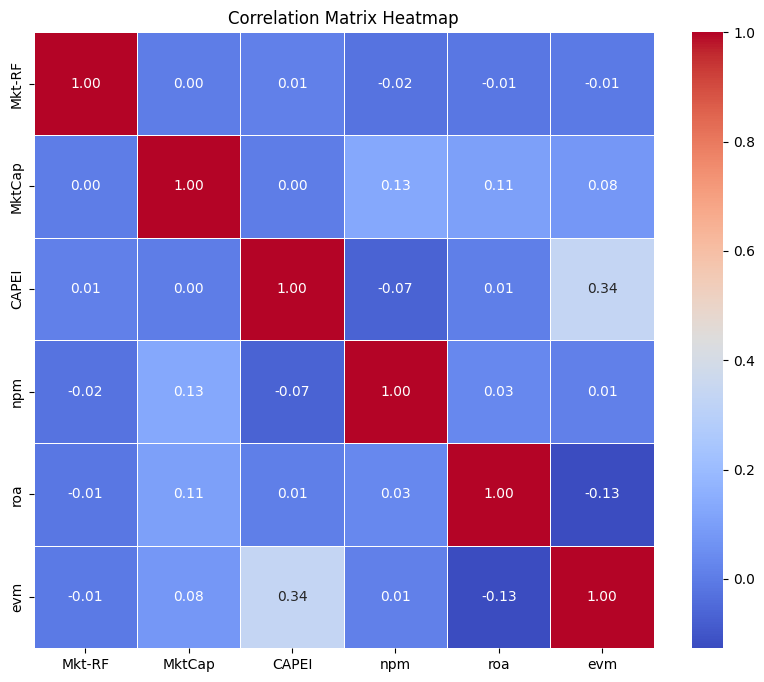

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the correlation matrix
corr_matrix = df_5_merge_winsorized[variables_of_interest].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Eigenvalues and Factor Pattern Tables

In [92]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Select only the relevant columns for PCA, excluding any non-numeric columns
columns_for_pca = variables_of_interest.copy()
data_for_pca = df_5_merge_winsorized[columns_for_pca]

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_for_pca)

# Perform PCA
pca = PCA()
# pca.fit(data_standardized)
principal_components = pca.fit_transform(data_standardized)

# Get the explained variance ratio (proportion of variance explained by each component)
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative variance explained
cumulative_variance = np.cumsum(explained_variance_ratio)

# Create a DataFrame for the eigenvalues
eigenvalues_df = pd.DataFrame({
    'Eigenvalue': pca.explained_variance_,
    'Difference': [0] + list(np.diff(pca.explained_variance_)),
    'Proportion': explained_variance_ratio,
    'Cumulative': cumulative_variance
}, index=range(1, len(pca.explained_variance_) + 1))

# Create a DataFrame for the factor pattern (component loadings)
factor_pattern_df = pd.DataFrame(pca.components_.T,
                                 index=columns_for_pca,
                                 columns=[f'Factor{i+1}' for i in range(pca.n_components_)])

# Output the eigenvalues and factor pattern tables
print("Eigenvalues Table:")
print(eigenvalues_df)

print("\nFactor Pattern Table:")
print(factor_pattern_df)

Eigenvalues Table:
   Eigenvalue  Difference  Proportion  Cumulative
1    1.363592    0.000000    0.227264    0.227264
2    1.185922   -0.177670    0.197653    0.424917
3    1.005823   -0.180099    0.167636    0.592553
4    0.993630   -0.012193    0.165604    0.758158
5    0.836164   -0.157465    0.139360    0.897518
6    0.614897   -0.221268    0.102482    1.000000

Factor Pattern Table:
         Factor1   Factor2   Factor3   Factor4   Factor5   Factor6
Mkt-RF  0.023838 -0.096072  0.748732  0.644709 -0.113265  0.033519
MktCap  0.043820  0.690613  0.100710  0.113613  0.680510 -0.187052
CAPEI   0.665501  0.052011  0.189942 -0.249550 -0.254070 -0.625699
npm    -0.107318  0.566062 -0.359099  0.403486 -0.606698 -0.090671
roa    -0.226003  0.416399  0.503247 -0.582830 -0.302149  0.302146
evm     0.701446  0.131542 -0.104741  0.081702  0.012214  0.687659


### Scree Plot

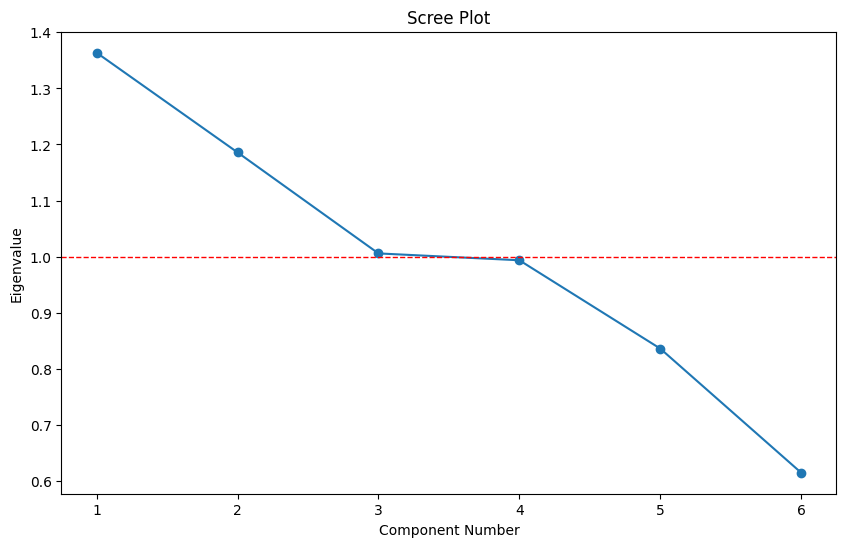

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
# Add a dashed horizontal line at y=1 (for example)
plt.axhline(y=1, color='r', linestyle='--', linewidth=1)
plt.show()

In [94]:
# Prepare for PCR
# Align the indices
y = df_5_merge_winsorized['ex_ret']
pc_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])], index=df_5_merge_winsorized.index)

# Select the first five principal components
pc_df = pc_df.iloc[:, :5]

# Add a constant term for the intercept
X = sm.add_constant(pc_df)

# Perform the OLS regression
model = sm.OLS(y, X).fit()

# Output the regression results
print(model.summary())

# Calculate VIF for the principal components
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF) Table:")
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                 ex_ret   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     9274.
Date:                Mon, 03 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:13:02   Log-Likelihood:             1.6613e+05
No. Observations:              213237   AIC:                        -3.323e+05
Df Residuals:                  213231   BIC:                        -3.322e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0350      0.000   -145.555      0.0

In [95]:
eigenvalues_pd = pd.DataFrame(eigenvalues_df)
eigenvalues_pd

,Eigenvalue,Difference,Proportion,Cumulative
1,1.363592,0.000000,0.227264,0.227264
2,1.185922,-0.177670,0.197653,0.424917
3,1.005823,-0.180099,0.167636,0.592553
4,0.993630,-0.012193,0.165604,0.758158
5,0.836164,-0.157465,0.139360,0.897518
6,0.614897,-0.221268,0.102482,1.000000


In [96]:
factor_pattern_pd = pd.DataFrame(factor_pattern_df)
factor_pattern_pd

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
Mkt-RF,0.023838,-0.096072,0.748732,0.644709,-0.113265,0.033519
MktCap,0.043820,0.690613,0.100710,0.113613,0.680510,-0.187052
CAPEI,0.665501,0.052011,0.189942,-0.249550,-0.254070,-0.625699
npm,-0.107318,0.566062,-0.359099,0.403486,-0.606698,-0.090671
roa,-0.226003,0.416399,0.503247,-0.582830,-0.302149,0.302146
evm,0.701446,0.131542,-0.104741,0.081702,0.012214,0.687659


## Correlation Matrix among principal components and ex_ret

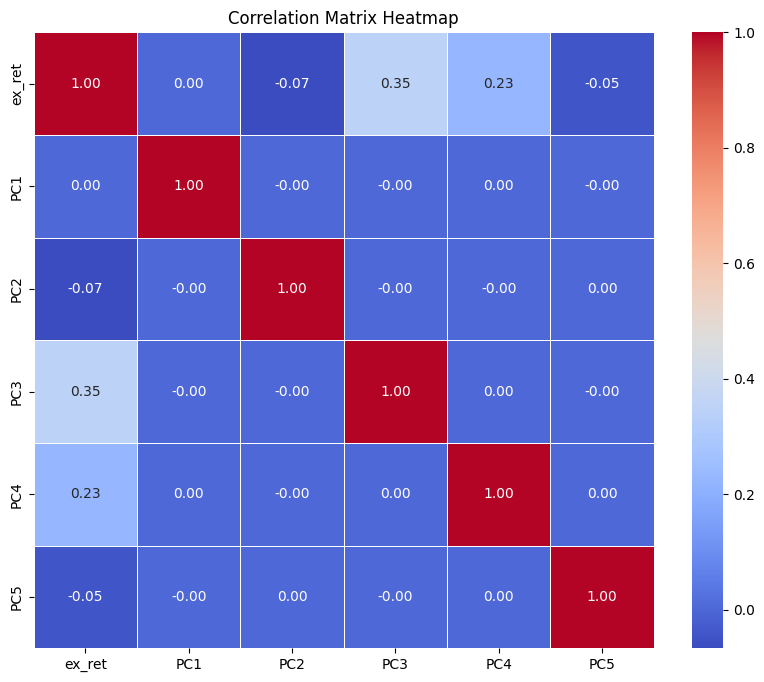

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'factors_df' is a DataFrame containing the factor scores
# Extract 'ex_ret' and the first six columns of 'factors_df'
data = pd.concat([df_5_merge_winsorized['ex_ret'], pc_df], axis=1)

# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


# PCA second run (Market_Premium is dropped)

In [98]:
# Update the list of variables of interest to include the new variables
variables_of_interest_new = ['MktCap', 'CAPEI', 'npm', 'roa','evm']

In [99]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Select only the relevant columns for PCA, excluding any non-numeric columns
columns_for_pca = variables_of_interest_new.copy()
data_for_pca = df_5_merge_winsorized[columns_for_pca]

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_for_pca)

# Perform PCA
pca = PCA()
# pca.fit(data_standardized)
principal_components = pca.fit_transform(data_standardized)

# Get the explained variance ratio (proportion of variance explained by each component)
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative variance explained
cumulative_variance = np.cumsum(explained_variance_ratio)

# Create a DataFrame for the eigenvalues
eigenvalues_df = pd.DataFrame({
    'Eigenvalue': pca.explained_variance_,
    'Difference': [0] + list(np.diff(pca.explained_variance_)),
    'Proportion': explained_variance_ratio,
    'Cumulative': cumulative_variance
}, index=range(1, len(pca.explained_variance_) + 1))

# Create a DataFrame for the factor pattern (component loadings)
factor_pattern_df = pd.DataFrame(pca.components_.T,
                                 index=columns_for_pca,
                                 columns=[f'Factor{i+1}' for i in range(pca.n_components_)])

# Output the eigenvalues and factor pattern tables
print("Eigenvalues Table:")
print(eigenvalues_df)

print("\nFactor Pattern Table:")
print(factor_pattern_df)

Eigenvalues Table:
   Eigenvalue  Difference  Proportion  Cumulative
1    1.363387    0.000000    0.272676    0.272676
2    1.184200   -0.179186    0.236839    0.509515
3    0.998822   -0.185378    0.199764    0.709279
4    0.838287   -0.160535    0.167657    0.876935
5    0.615327   -0.222960    0.123065    1.000000

Factor Pattern Table:
         Factor1   Factor2   Factor3   Factor4   Factor5
MktCap  0.044835  0.697545 -0.019507  0.690261 -0.185955
CAPEI   0.665645  0.050171  0.312391 -0.253858 -0.626393
npm    -0.105321  0.564569 -0.544409 -0.604216 -0.093336
roa    -0.224996  0.419577  0.767180 -0.306528  0.301342
evm     0.702276  0.127005 -0.130706  0.007728  0.688139


In [100]:
factor_pattern_pd = pd.DataFrame(factor_pattern_df)
factor_pattern_pd

,Factor1,Factor2,Factor3,Factor4,Factor5
MktCap,0.044835,0.697545,-0.019507,0.690261,-0.185955
CAPEI,0.665645,0.050171,0.312391,-0.253858,-0.626393
npm,-0.105321,0.564569,-0.544409,-0.604216,-0.093336
roa,-0.224996,0.419577,0.767180,-0.306528,0.301342
evm,0.702276,0.127005,-0.130706,0.007728,0.688139


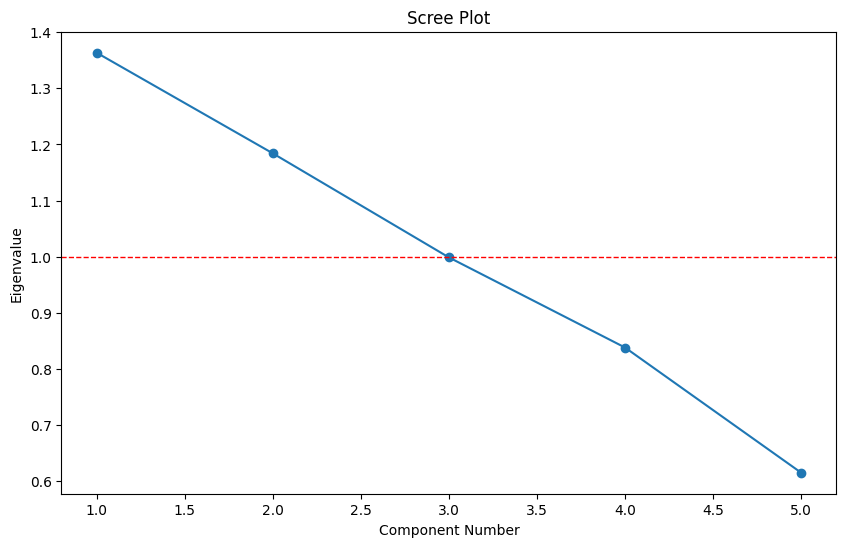

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
# Add a dashed horizontal line at y=1 (for example)
plt.axhline(y=1, color='r', linestyle='--', linewidth=1)
plt.show()

In [102]:
# Prepare for PCR
# Align the indices
y = df_5_merge_winsorized['ex_ret']
pc_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])], index=df_5_merge_winsorized.index)

# Select the first four principal components
pc_df = pc_df.iloc[:, :4]

# Add 'Mkt-RF' to the design matrix
X = pd.concat([pc_df, df_5_merge_winsorized[['Mkt-RF']]], axis=1)

# Add a constant term for the intercept
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(y, X).fit()

# Output the regression results
print(model.summary())

# Calculate VIF for the principal components
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF) Table:")
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                 ex_ret   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     9221.
Date:                Mon, 03 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:13:02   Log-Likelihood:             1.6602e+05
No. Observations:              213237   AIC:                        -3.320e+05
Df Residuals:                  213231   BIC:                        -3.320e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0462      0.000   -187.436      0.0

# <center>Task 6</center> #

In [103]:
# Load the stock data part3 dataset 
df_part_3 = pd.read_csv('Stock_data_part3.csv')

# Convert 'date' column to datetime if it's not already done by parse_dates

df_part_3['date'] = pd.to_datetime(df_part_3['date'], errors='coerce')

df_part_3

,PERMNO,date,SHRCD,TICKER,PERMCO,CUSIP,HSICIG,PRC,VOL,RET,SHROUT,SPREAD
0,10001,2010-01-29,11.0,EGAS,7953,36720410,NaN,10.06000,3104.0,-0.018932,4361.0,NaN
1,10001,2010-02-26,11.0,EGAS,7953,36720410,NaN,10.00840,1510.0,-0.000656,4361.0,NaN
2,10001,2010-03-31,11.0,EGAS,7953,36720410,NaN,10.17000,2283.0,0.020643,4361.0,NaN
3,10001,2010-04-30,11.0,EGAS,7953,36720410,NaN,11.39000,3350.0,0.124385,6070.0,NaN
4,10001,2010-05-28,11.0,EGAS,7953,36720410,NaN,11.40000,3451.0,0.004829,6071.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1176723,93436,2022-08-31,11.0,TSLA,53453,88160R10,NaN,275.60999,7322218.0,-0.072489,3133470.0,NaN
1176724,93436,2022-09-30,11.0,TSLA,53453,88160R10,NaN,265.25000,12965500.0,-0.037589,3158000.0,NaN
1176725,93436,2022-10-31,11.0,TSLA,53453,88160R10,NaN,227.53999,17325849.0,-0.142168,3157752.0,NaN
1176726,93436,2022-11-30,11.0,TSLA,53453,88160R10,NaN,194.70000,18824244.0,-0.144326,3157752.0,NaN


In [104]:
df_part_3['TICKER'].nunique()

16120

# Merge df_part_3 with combined_finra_data

In [105]:
# Load the combined_finra_data dataset 
df_finra = pd.read_csv('finra_data_20161230.csv',usecols=['TICKER', 'Test_Group'],
                 low_memory=False)


df_finra = df_finra.drop_duplicates()

df_finra

,TICKER,Test_Group
0,AAON,G1
1,ABCB,G1
2,ABG,G2
3,ABTL,C
4,ACBI,G1
...,...,...
99461,HRMN,C
111996,WBKC,C
254820,OACQ,G3
352818,ELEC,C


In [106]:
# Merge two datasets

df_6_merge = pd.merge(df_part_3, df_finra[['TICKER','Test_Group']], on=['TICKER'], how='left')

df_6_merge

,PERMNO,date,SHRCD,TICKER,PERMCO,CUSIP,HSICIG,PRC,VOL,RET,SHROUT,SPREAD,Test_Group
0,10001,2010-01-29,11.0,EGAS,7953,36720410,NaN,10.06000,3104.0,-0.018932,4361.0,NaN,G1
1,10001,2010-02-26,11.0,EGAS,7953,36720410,NaN,10.00840,1510.0,-0.000656,4361.0,NaN,G1
2,10001,2010-03-31,11.0,EGAS,7953,36720410,NaN,10.17000,2283.0,0.020643,4361.0,NaN,G1
3,10001,2010-04-30,11.0,EGAS,7953,36720410,NaN,11.39000,3350.0,0.124385,6070.0,NaN,G1
4,10001,2010-05-28,11.0,EGAS,7953,36720410,NaN,11.40000,3451.0,0.004829,6071.0,NaN,G1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176723,93436,2022-08-31,11.0,TSLA,53453,88160R10,NaN,275.60999,7322218.0,-0.072489,3133470.0,NaN,NaN
1176724,93436,2022-09-30,11.0,TSLA,53453,88160R10,NaN,265.25000,12965500.0,-0.037589,3158000.0,NaN,NaN
1176725,93436,2022-10-31,11.0,TSLA,53453,88160R10,NaN,227.53999,17325849.0,-0.142168,3157752.0,NaN,NaN
1176726,93436,2022-11-30,11.0,TSLA,53453,88160R10,NaN,194.70000,18824244.0,-0.144326,3157752.0,NaN,NaN


## Extract SHRCD = 11

In [107]:
# Extract and put into a new dataset
df_SHRCD11 = df_6_merge[df_6_merge['SHRCD'] == 11.0]


df_SHRCD11

,PERMNO,date,SHRCD,TICKER,PERMCO,CUSIP,HSICIG,PRC,VOL,RET,SHROUT,SPREAD,Test_Group
0,10001,2010-01-29,11.0,EGAS,7953,36720410,NaN,10.06000,3104.0,-0.018932,4361.0,NaN,G1
1,10001,2010-02-26,11.0,EGAS,7953,36720410,NaN,10.00840,1510.0,-0.000656,4361.0,NaN,G1
2,10001,2010-03-31,11.0,EGAS,7953,36720410,NaN,10.17000,2283.0,0.020643,4361.0,NaN,G1
3,10001,2010-04-30,11.0,EGAS,7953,36720410,NaN,11.39000,3350.0,0.124385,6070.0,NaN,G1
4,10001,2010-05-28,11.0,EGAS,7953,36720410,NaN,11.40000,3451.0,0.004829,6071.0,NaN,G1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176723,93436,2022-08-31,11.0,TSLA,53453,88160R10,NaN,275.60999,7322218.0,-0.072489,3133470.0,NaN,NaN
1176724,93436,2022-09-30,11.0,TSLA,53453,88160R10,NaN,265.25000,12965500.0,-0.037589,3158000.0,NaN,NaN
1176725,93436,2022-10-31,11.0,TSLA,53453,88160R10,NaN,227.53999,17325849.0,-0.142168,3157752.0,NaN,NaN
1176726,93436,2022-11-30,11.0,TSLA,53453,88160R10,NaN,194.70000,18824244.0,-0.144326,3157752.0,NaN,NaN


In [108]:
# Drop duplicates based on 'TICKER' and 'date' combination, keeping the first occurrence

df_SHRCD11_dp = df_SHRCD11.drop_duplicates(subset=['TICKER', 'date'], keep='first')

# Verify the operation by checking for duplicates again

print(df_SHRCD11_dp[df_SHRCD11_dp.duplicated(subset=['TICKER', 'date'], keep=False)])

Empty DataFrame
Columns: [PERMNO, date, SHRCD, TICKER, PERMCO, CUSIP, HSICIG, PRC, VOL, RET, SHROUT, SPREAD, Test_Group]
Index: []


In [109]:
missing_values_count = df_SHRCD11_dp.isna().sum()

print("Missing values count for each variable:")
print(missing_values_count)

Missing values count for each variable:
PERMNO             0
date               0
SHRCD              0
TICKER           154
PERMCO             0
CUSIP              0
HSICIG        577243
PRC             3387
VOL              612
RET             3233
SHROUT           415
SPREAD        582935
Test_Group    344865
dtype: int64


In [110]:
# Set variables to be numeric
numeric_columns = ['SPREAD']
for column in numeric_columns:
    df_SHRCD11_dp.loc[:, column] = pd.to_numeric(df_SHRCD11_dp[column], errors='coerce')



# Replace instances of SPREAD = 0 with NaN 

df_SHRCD11_dp['SPREAD'] = df_SHRCD11_dp['SPREAD'].replace(0, np.nan)

# Drop missing values in "SPREAD"

df_SHRCD11_dp.dropna(subset=['SPREAD'],inplace=True)

# Transform PRC to positive
df_SHRCD11_dp['PRC'] = df_SHRCD11_dp['PRC'].abs()

# Create RelSpread
df_SHRCD11_dp['RelSpread'] = df_SHRCD11_dp['SPREAD'] / df_SHRCD11_dp['PRC']

# Replace instances of RelSpread = 0 with NaN 

df_SHRCD11_dp['RelSpread'] = df_SHRCD11_dp['RelSpread'].replace(0, np.nan)

# Drop missing values in "RelSpread"

df_SHRCD11_dp.dropna(subset=['RelSpread'],inplace=True)

df_SHRCD11_dp

C:\Users\24211\AppData\Local\Temp\ipykernel_39888\2440519321.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SHRCD11_dp['SPREAD'] = df_SHRCD11_dp['SPREAD'].replace(0, np.nan)
C:\Users\24211\AppData\Local\Temp\ipykernel_39888\2440519321.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SHRCD11_dp.dropna(subset=['SPREAD'],inplace=True)
C:\Users\24211\AppData\Local\Temp\ipykernel_39888\2440519321.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,PERMNO,date,SHRCD,TICKER,PERMCO,CUSIP,HSICIG,PRC,VOL,RET,SHROUT,SPREAD,Test_Group,RelSpread
447,10028,2016-05-31,11.0,DGSE,7978,29402E10,NaN,0.53000,1615.0,-0.032317,12329.0,0.0400,NaN,0.075472
1311,10100,2010-01-29,11.0,AMCE,8042,02713510,NaN,0.94950,1245.0,0.300685,4755.0,0.3010,NaN,0.317009
1312,10100,2010-02-26,11.0,AMCE,8042,02713510,NaN,0.70505,667.0,-0.257451,4755.0,0.0897,NaN,0.127225
1315,10100,2010-05-28,11.0,ALRN,8042,02713510,NaN,0.80500,2629.0,0.059211,4755.0,0.0900,NaN,0.111801
1318,10100,2010-08-31,11.0,ALRN,8042,02713510,NaN,0.82005,1094.0,0.138958,4755.0,0.1399,NaN,0.170599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170091,93368,2014-09-30,11.0,EBMT,53402,26942G10,NaN,10.72000,887.0,0.000924,3866.0,0.0600,G2,0.005597
1170108,93368,2016-02-29,11.0,EBMT,53402,26942G10,NaN,11.27000,393.0,-0.044018,3779.0,0.1800,G2,0.015972
1170512,93371,2011-07-29,11.0,CRMD,53357,21900C30,NaN,1.30500,1144.0,-0.100000,11408.0,0.0300,NaN,0.022989
1170525,93371,2012-08-31,11.0,CRMD,53357,21900C30,NaN,0.19000,856.0,-0.173913,11408.0,0.0200,NaN,0.105263


### Filter the date

In [111]:
# Filter the date

df_SHRCD11_dp_filtered = df_SHRCD11_dp[(df_SHRCD11_dp['date'] >= '2015-10-03') & (df_SHRCD11_dp['date'] <= '2017-12-31')]


In [112]:
df_SHRCD11_new = df_SHRCD11_dp_filtered.copy()

# Drop the original column 'Date' which is in string format
df_SHRCD11_new.drop(columns=['PERMNO','SHRCD', 'PERMCO', 'CUSIP', 'HSICIG', 'PRC',
       'VOL', 'RET', 'SHROUT'], inplace=True)

# Convert 'date' column to datetime if it's not already done by parse_dates

df_SHRCD11_new['date'] = pd.to_datetime(df_SHRCD11_new['date'], errors='coerce')

In [113]:
# create dummy for before and after
df_SHRCD11_new['d_after'] = df_SHRCD11_new['date'].apply(lambda x: 1 if x > pd.Timestamp('2016-10-01') else 0)

# create dummy for each test group
df_SHRCD11_new['d_G1'] = df_SHRCD11_new['Test_Group'].apply(lambda x: 1 if x == 'G1' else 0)
df_SHRCD11_new['d_G2'] = df_SHRCD11_new['Test_Group'].apply(lambda x: 1 if x == 'G2' else 0)
df_SHRCD11_new['d_G3'] = df_SHRCD11_new['Test_Group'].apply(lambda x: 1 if x == 'G3' else 0)

In [114]:
df_did = df_SHRCD11_new.copy()

df_did

,date,TICKER,SPREAD,Test_Group,RelSpread,d_after,d_G1,d_G2,d_G3
447,2016-05-31,DGSE,0.04,NaN,0.075472,0,0,0,0
3586,2016-04-29,ESBK,0.25,G1,0.013605,0,1,0,0
3598,2017-04-28,ESBK,0.25,G1,0.011834,1,1,0,0
4649,2015-10-30,HVT,0.15,G3,0.006423,0,0,0,1
4650,2015-11-30,HVT,0.10,G3,0.004153,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1146688,2017-11-30,EMCF,1.75,C,0.058091,1,0,0,0
1146689,2017-12-29,EMCF,2.49,C,0.078785,1,0,0,0
1155661,2015-10-30,AFCB,6.14,NaN,0.228083,0,0,0,0
1155662,2015-11-30,AFCB,3.40,NaN,0.120354,0,0,0,0


## The first test group condition

In [115]:
# Model with clustered standard errors (by d_G1)
model_text_clustered = sm.OLS.from_formula('RelSpread ~ d_after * d_G1 + d_after + d_G1 + C(TICKER)', data=df_did)
result_text_clustered = model_text_clustered.fit(cov_type='cluster', cov_kwds={'groups': df_did['d_G1']})
print(result_text_clustered.summary())



                            OLS Regression Results                            
Dep. Variable:              RelSpread   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                 5.847e+24
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           2.92e-13
Time:                        23:13:04   Log-Likelihood:                 1545.8
No. Observations:                1343   AIC:                            -2444.
Df Residuals:                    1019   BIC:                            -758.0
Df Model:                         323                                         
Covariance Type:              cluster                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0307   5.64

C:\Users\24211\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 324, but rank is 2
  warnings.warn('covariance of constraints does not have full '


In [116]:
# Export to txt
with open('regression_results_G1.txt', 'w') as f:
    f.write(result_text_clustered.summary().as_text())

## The second test group condition

In [117]:
# Model with clustered standard errors (by d_G2)
model_text_clustered = sm.OLS.from_formula('RelSpread ~  d_after * d_G2 + d_after + d_G2 + C(TICKER)', data=df_did)
result_text_clustered = model_text_clustered.fit(cov_type='cluster', cov_kwds={'groups': df_did[['d_G2']]})
print(result_text_clustered.summary())



                            OLS Regression Results                            
Dep. Variable:              RelSpread   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                -5.977e+39
Date:                Mon, 03 Jun 2024   Prob (F-statistic):               1.00
Time:                        23:13:04   Log-Likelihood:                 1549.8
No. Observations:                1343   AIC:                            -2452.
Df Residuals:                    1019   BIC:                            -765.9
Df Model:                         323                                         
Covariance Type:              cluster                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0506   1.24

C:\Users\24211\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 324, but rank is 2
  warnings.warn('covariance of constraints does not have full '


In [118]:
# Export to txt
with open('regression_results_G2.txt', 'w') as f:
    f.write(result_text_clustered.summary().as_text())

## The third test group condition

In [119]:
# Model with clustered standard errors (by d_G3)
model_text_clustered = sm.OLS.from_formula('RelSpread ~ d_after * d_G3 + d_after + d_G3 + C(TICKER)', data=df_did)
result_text_clustered = model_text_clustered.fit(cov_type='cluster', cov_kwds={'groups': df_did[['d_G3']]})
print(result_text_clustered.summary())



C:\Users\24211\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 324, but rank is 2
  warnings.warn('covariance of constraints does not have full '


                            OLS Regression Results                            
Dep. Variable:              RelSpread   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                 1.360e+38
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           6.06e-20
Time:                        23:13:05   Log-Likelihood:                 1545.9
No. Observations:                1343   AIC:                            -2444.
Df Residuals:                    1019   BIC:                            -758.1
Df Model:                         323                                         
Covariance Type:              cluster                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0300   6.15

In [120]:
# Export to txt
with open('regression_results_G3.txt', 'w') as f:
    f.write(result_text_clustered.summary().as_text())